# E-Commerce Shipping - Classification

## Contents:

- Data Description & Cleaning
- Exploratory Data Analysis (EDA)
        o Categorical Features
        o Numerical Features
        o Target Column
- Outliers
        o Log Transformation
        o Square Root Transformation
        o Winsorization
- Heatmap
- One-Hot-Encoding
- Scaling
        o Normalization
        o Standardization
- Building Machine Learning Models
        o Logistic Regression
        o KNN
        o Decision Trees
        o Random Forest
        o AdaBoost
        o Gradient Boosting
        o Extra Trees
        o CatBoost
        o Support Vector Machines
        o XGBoost
        o LightGBM
- Hyperparameter Tuning
        o Logistic Regression
        o KNN
        o Decision Trees
        o Random Forest
        o AdaBoost
        o Gradient Boosting
        o Extra Trees
        o CatBoost
        o Support Vector Machines
        o XGBoost
        o LightGBM
- Best Parameters & Comparison
- Classification with Artificial Neural Networks (ANNs)

## Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## Columns
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

- **ID**: ID Number of Customers.
- **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.
- **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
- **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- **Cost of the product**: Cost of the Product in US Dollars.
- **Prior purchases**: The Number of Prior Purchase.
- **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
- **Gender**: Male and Female.
- **Discount offered**: Discount offered on that specific product.
- **Weight in gms**: It is the weight in grams.
- **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

\
**Data Source:** https://www.kaggle.com/prachi13/customer-analytics

# Data Descrition & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy.stats.mstats import winsorize

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df = pd.read_csv('Train.csv')

df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [3]:
df.describe(include='all')

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
count   10999.00000           10999            10999         10999.000000   
unique          NaN               5                3                  NaN   
top             NaN               F             Ship                  NaN   
freq            NaN            3666             7462                  NaN   
mean     5500.00000             NaN              NaN             4.054459   
std      3175.28214             NaN              NaN             1.141490   
min         1.00000             NaN              NaN             2.000000   
25%      2750.50000             NaN              NaN             3.000000   
50%      5500.00000             NaN              NaN             4.000000   
75%      8249.50000             NaN              NaN             5.000000   
max     10999.00000             NaN              NaN             7.000000   

        Customer_rating  Cost_of_the_Product  Prior_purchases  \
count      10999.000000         10999.000000     10999.000000   
unique              NaN                  NaN              NaN   
top                 NaN                  NaN              NaN   
freq                NaN                  NaN              NaN   
mean           2.990545           210.196836         3.567597   
std            1.413603            48.063272         1.522860   
min            1.000000            96.000000         2.000000   
25%            2.000000           169.000000         3.000000   
50%            3.000000           214.000000         3.000000   
75%            4.000000           251.000000         4.000000   
max            5.000000           310.000000        10.000000   

       Product_importance Gender  Discount_offered  Weight_in_gms  \
count               10999  10999      10999.000000   10999.000000   
unique                  3      2               NaN            NaN   
top                   low      F               NaN            NaN   
freq                 5297   5545               NaN            NaN   
mean                  NaN    NaN         13.373216    3634.016729   
std                   NaN    NaN         16.205527    1635.377251   
min                   NaN    NaN          1.000000    1001.000000   
25%                   NaN    NaN          4.000000    1839.500000   
50%                   NaN    NaN          7.000000    4149.000000   
75%                   NaN    NaN         10.000000    5050.000000   
max                   NaN    NaN         65.000000    7846.000000   

        Reached.on.Time_Y.N  
count          10999.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean               0.596691  
std                0.490584  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.drop('ID', axis=1, inplace=True)
df.rename({'Reached.on.Time_Y.N':'Reached_on_Time'}, axis=1, inplace=True)
df['Reached_on_Time'].replace({1:'No', 0:'Yes'}, inplace=True)

In [6]:
print("Percentage of Null Values:\n")
print(df.isna().sum()*100/df.shape[0])

Percentage of Null Values:

Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached_on_Time        0.0
dtype: float64


In [7]:
print("# of Unique Values: \n")
print(df.nunique())

# of Unique Values: 

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached_on_Time           2
dtype: int64


In [8]:
print("Unique Values:\n")
for i in range(len(df.nunique())):
    if df.nunique()[i] < 10:
        print("- ", df.nunique().index[i], ": ", sorted(df.iloc[:, i].unique()), sep='')

Unique Values:

- Warehouse_block: ['A', 'B', 'C', 'D', 'F']
- Mode_of_Shipment: ['Flight', 'Road', 'Ship']
- Customer_care_calls: [2, 3, 4, 5, 6, 7]
- Customer_rating: [1, 2, 3, 4, 5]
- Prior_purchases: [2, 3, 4, 5, 6, 7, 8, 10]
- Product_importance: ['high', 'low', 'medium']
- Gender: ['F', 'M']
- Reached_on_Time: ['No', 'Yes']


In [9]:
print("Columns:")
for column in df.columns:
    print("- {}".format(column))

Columns:
- Warehouse_block
- Mode_of_Shipment
- Customer_care_calls
- Customer_rating
- Cost_of_the_Product
- Prior_purchases
- Product_importance
- Gender
- Discount_offered
- Weight_in_gms
- Reached_on_Time


# Exploratory Data Analysis (EDA)

## Categorical Features

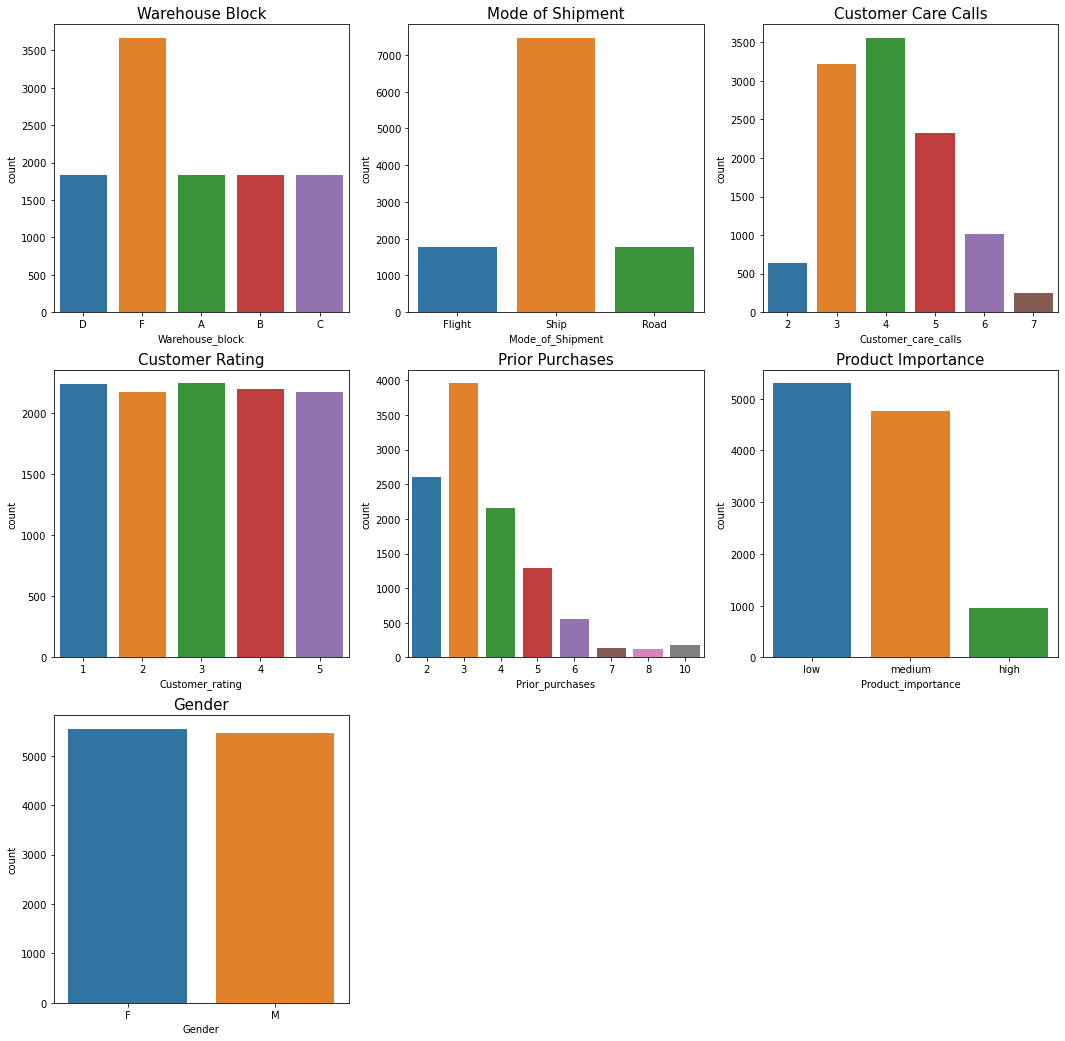

In [10]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', data=df)
plt.title('Warehouse Block', fontsize=15)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', data=df)
plt.title('Mode of Shipment', fontsize=15)

plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', data=df)
plt.title('Customer Care Calls', fontsize=15)

plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', data=df)
plt.title('Customer Rating', fontsize=15)

plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', data=df)
plt.title('Prior Purchases', fontsize=15)

plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', data=df)
plt.title('Product Importance', fontsize=15)

plt.subplot(3, 3, 7)
sns.countplot(x='Gender', data=df)
plt.title('Gender', fontsize=15)

plt.show()

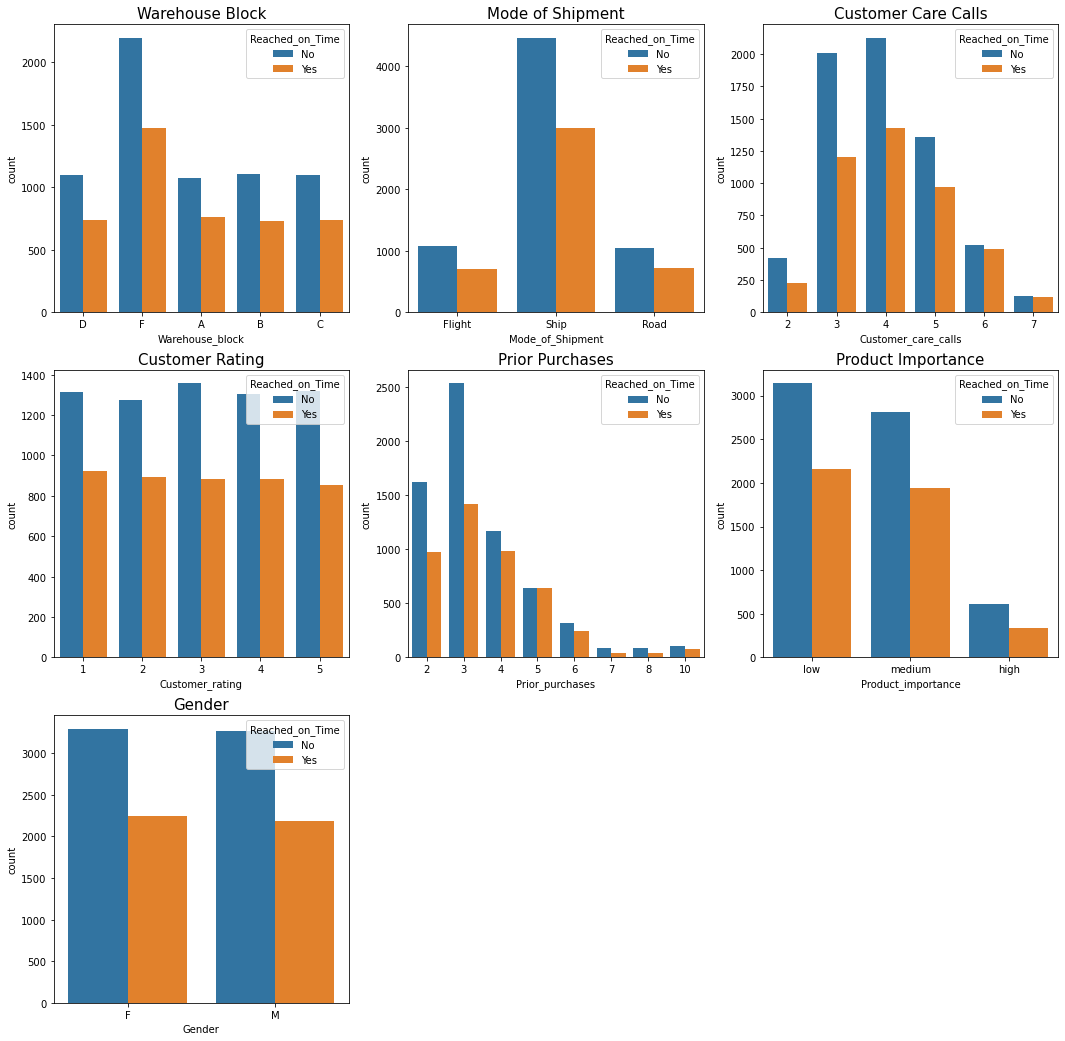

In [11]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', hue='Reached_on_Time', data=df)
plt.title('Warehouse Block', fontsize=15)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', hue='Reached_on_Time', data=df)
plt.title('Mode of Shipment', fontsize=15)

plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', hue='Reached_on_Time',  data=df)
plt.title('Customer Care Calls', fontsize=15)

plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', hue='Reached_on_Time',  data=df)
plt.title('Customer Rating', fontsize=15)

plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', hue='Reached_on_Time',  data=df)
plt.title('Prior Purchases', fontsize=15)

plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', hue='Reached_on_Time',  data=df)
plt.title('Product Importance', fontsize=15)

plt.subplot(3, 3, 7)
sns.countplot(x='Gender', hue='Reached_on_Time',  data=df)
plt.title('Gender', fontsize=15)

plt.show()

## Numeric Features

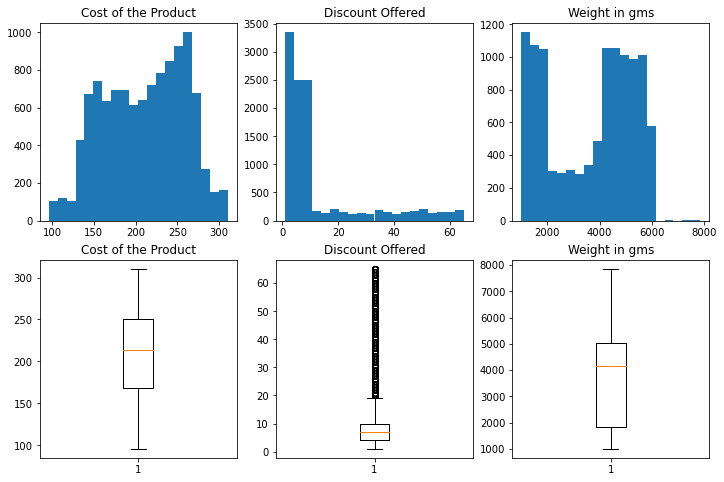

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(df['Cost_of_the_Product'], bins=20)
plt.title('Cost of the Product')

plt.subplot(2, 3, 2)
plt.hist(df['Discount_offered'], bins=20)
plt.title('Discount Offered')

plt.subplot(2, 3, 3)
plt.hist(df['Weight_in_gms'], bins=20)
plt.title('Weight in gms')

plt.subplot(2, 3, 4)
plt.boxplot(df['Cost_of_the_Product'])
plt.title('Cost of the Product')

plt.subplot(2, 3, 5)
plt.boxplot(df['Discount_offered'])
plt.title('Discount Offered')

plt.subplot(2, 3, 6)
plt.boxplot(df['Weight_in_gms'])
plt.title('Weight in gms')

plt.show()

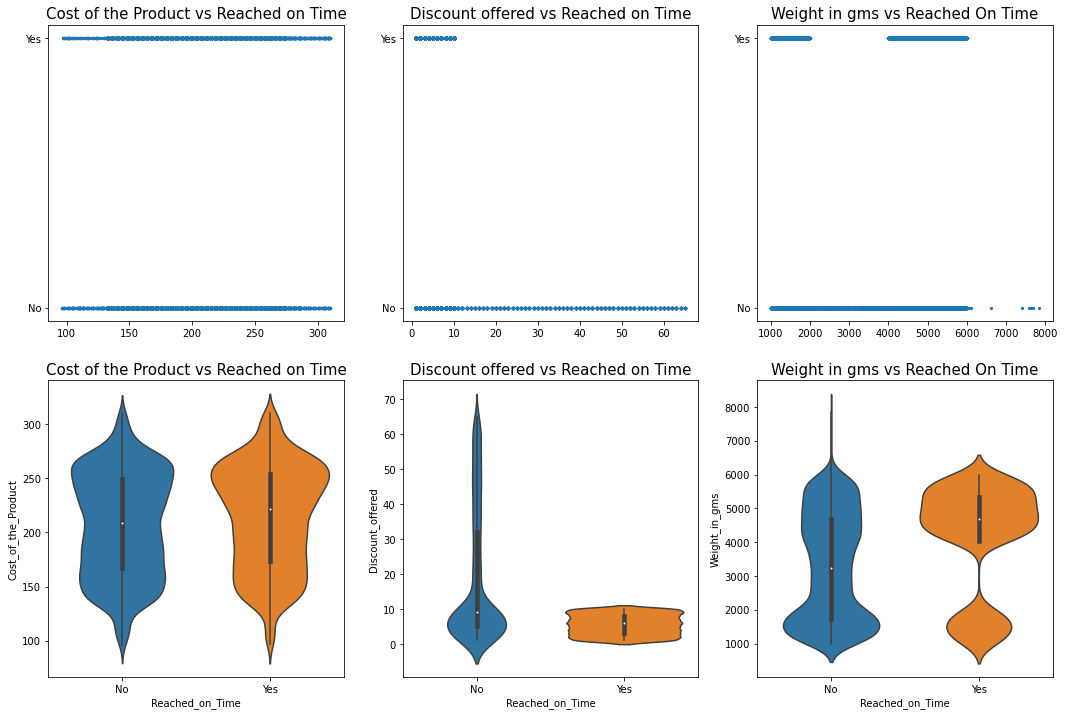

In [13]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.scatter(df['Cost_of_the_Product'], df['Reached_on_Time'], s=5)
plt.title("Cost of the Product vs Reached on Time", fontsize=15)

plt.subplot(2, 3, 2)
plt.scatter(df['Discount_offered'], df['Reached_on_Time'], s=5)
plt.title("Discount offered vs Reached on Time", fontsize=15)

plt.subplot(2, 3, 3)
plt.scatter(df['Weight_in_gms'], df['Reached_on_Time'], s=5)
plt.title("Weight in gms vs Reached On Time", fontsize=15)

plt.subplot(2, 3, 4)
sns.violinplot(x='Reached_on_Time', y='Cost_of_the_Product', data=df)
plt.title("Cost of the Product vs Reached on Time", fontsize=15)

plt.subplot(2, 3, 5)
sns.violinplot(x='Reached_on_Time', y='Discount_offered', data=df)
plt.title("Discount offered vs Reached on Time", fontsize=15)

plt.subplot(2, 3, 6)
sns.violinplot(x='Reached_on_Time', y='Weight_in_gms', data=df)
plt.title("Weight in gms vs Reached On Time", fontsize=15)

plt.show()

## Target Column

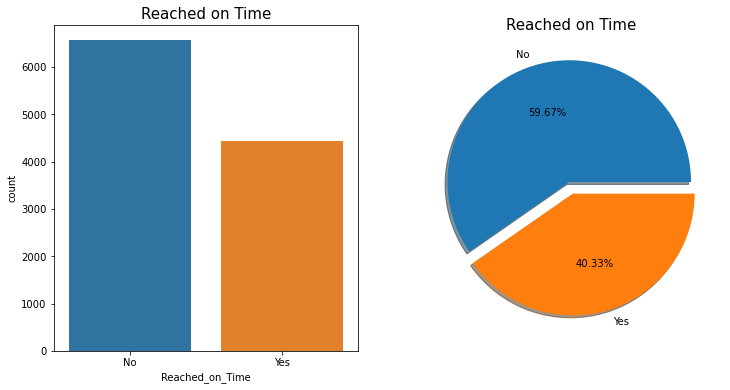

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Reached_on_Time', data=df)
plt.title('Reached on Time', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df['Reached_on_Time'].value_counts(), labels=['No', 'Yes'], explode=[0.05, 0.05], autopct='%1.2f%%', shadow=True)
plt.title('Reached on Time', fontsize=15)

plt.show()

# Outliers

According to the boxplots created earlier, the only column with outliers seems to be on "**Discount_offered**" column. But there seems to be a lot of outliers in this feature, because of the way boxplot defines outliers. Therefore, instead of directly removing or winsorizing those outliers, I will first apply **Log transformation** and **Square root transformation** to see which works better. Then, I will **winsorize** the remaining outliers.

In [15]:
def sum_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

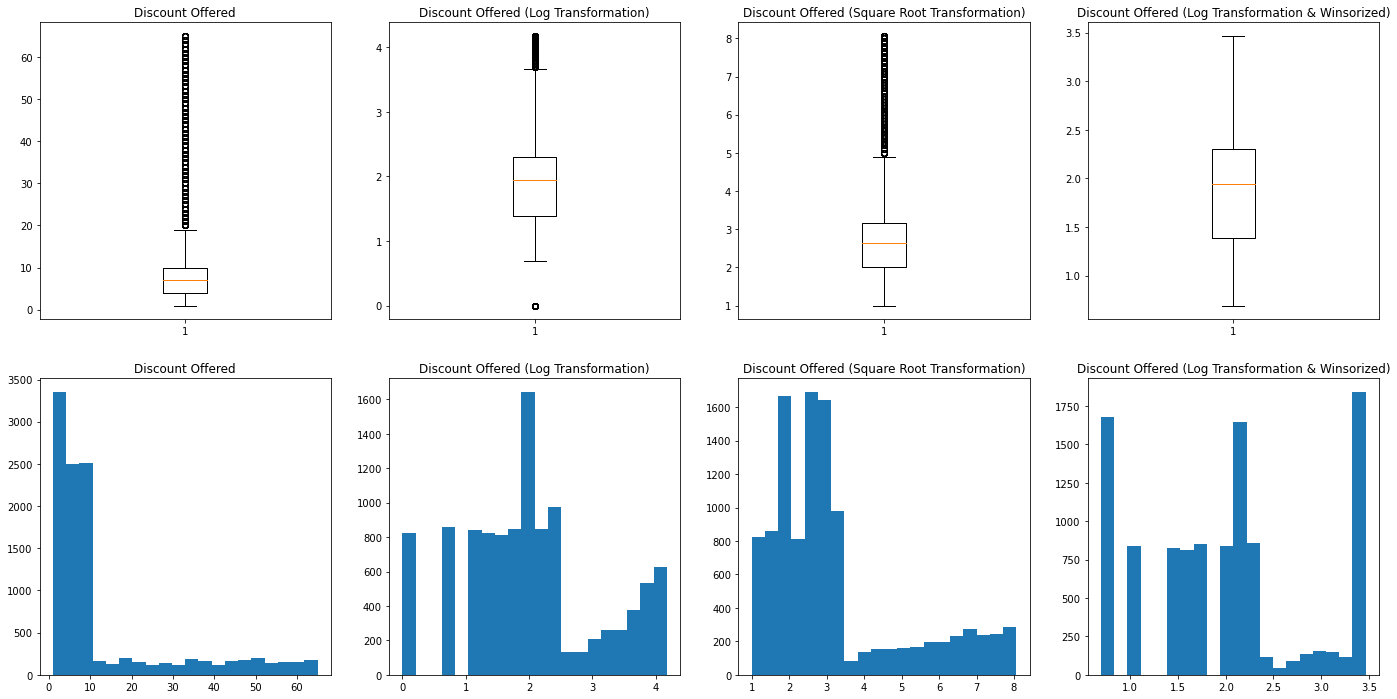

In [16]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 4, 1)
plt.boxplot(df['Discount_offered'])
plt.title('Discount Offered')

plt.subplot(2, 4, 2)
plt.boxplot(np.log(df['Discount_offered']))
plt.title('Discount Offered (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(np.sqrt(df['Discount_offered']))
plt.title('Discount Offered (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(winsorize(np.log(df['Discount_offered']),limits=(0.15, 0.15)));
plt.title('Discount Offered (Log Transformation & Winsorized)')

plt.subplot(2, 4, 5)
plt.hist(df['Discount_offered'], bins=20)
plt.title('Discount Offered')

plt.subplot(2, 4, 6)
plt.hist(np.log(df['Discount_offered']), bins=20)
plt.title('Discount Offered (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(np.sqrt(df['Discount_offered']), bins=20)
plt.title('Discount Offered (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(winsorize(np.log(df['Discount_offered']),limits=(0.15, 0.15)), bins=20);
plt.title('Discount Offered (Log Transformation & Winsorized)')


plt.show()

In [17]:
print("Total number of observations: {}".format(len(df['Discount_offered'])))
print("Number of outliers in 'Discount_offered': {}".format(sum_outliers(df['Discount_offered'])))
print("Number of outliers in 'Discount_offered' (Log Transformation): {}".format(sum_outliers(np.log(df['Discount_offered']))))
print("Number of outliers in 'Discount_offered' (Square Root Transformation): {}".format(sum_outliers(np.sqrt(df['Discount_offered']))))
print("Number of outliers in 'Discount_offered' (Log Transformation & Winsorized): {}".format(sum_outliers(winsorize(np.log(df['Discount_offered']),limits=(0.15, 0.15)))))

Total number of observations: 10999
Number of outliers in 'Discount_offered': 2209
Number of outliers in 'Discount_offered' (Log Transformation): 2104
Number of outliers in 'Discount_offered' (Square Root Transformation): 1955
Number of outliers in 'Discount_offered' (Log Transformation & Winsorized): 0


In [18]:
df['Discount_offered'] = np.array(winsorize(np.log(df['Discount_offered']),limits=(0.15, 0.15)))

# Heatmap

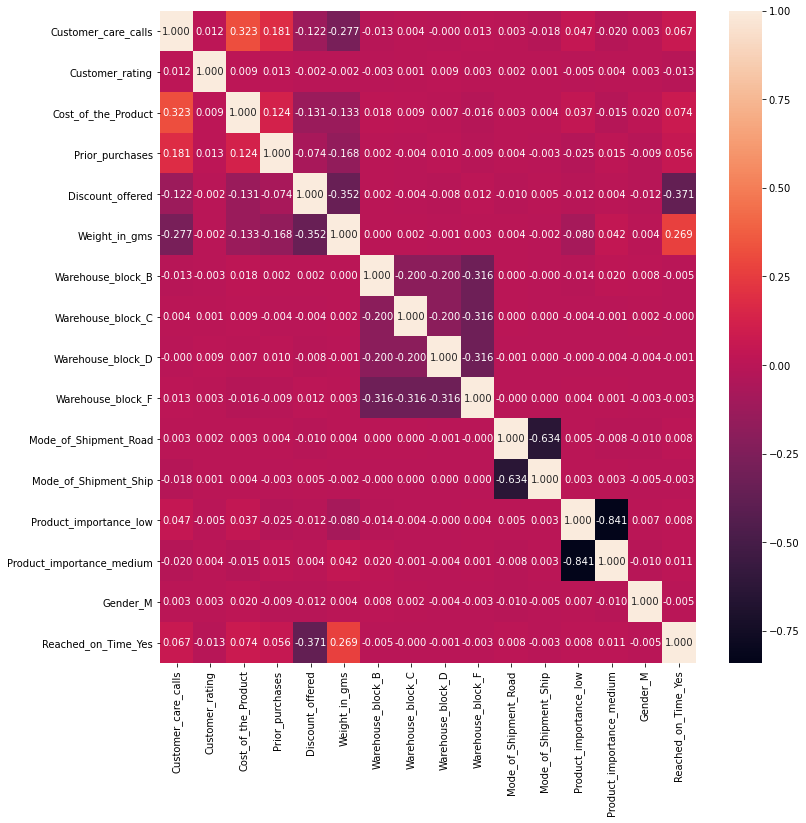

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap(pd.get_dummies(df, drop_first=True).corr(), annot=True, fmt='.3f')
plt.show()

In [20]:
pd.get_dummies(df, drop_first=False).corr()['Reached_on_Time_Yes'].sort_values(ascending=False)

Reached_on_Time_Yes          1.000000
Weight_in_gms                0.268793
Cost_of_the_Product          0.073587
Customer_care_calls          0.067126
Prior_purchases              0.055515
Product_importance_medium    0.011099
Warehouse_block_A            0.009317
Mode_of_Shipment_Road        0.007671
Product_importance_low       0.007667
Gender_F                     0.004689
Warehouse_block_C           -0.000132
Warehouse_block_D           -0.000830
Warehouse_block_F           -0.002568
Mode_of_Shipment_Ship       -0.002577
Mode_of_Shipment_Flight     -0.004371
Gender_M                    -0.004689
Warehouse_block_B           -0.005106
Customer_rating             -0.013119
Product_importance_high     -0.033242
Discount_offered            -0.370837
Reached_on_Time_No          -1.000000
Name: Reached_on_Time_Yes, dtype: float64

- **Weight**, and **Cost** are _positively_, amount of **Discount** is _negatively_ correlated with the target variable.
- Overall, there doesn't seem to be the problem of **multicollinearity**.

# One-Hot-Encoding

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
X = df.drop('Reached_on_Time_Yes', axis=1)
y = df['Reached_on_Time_Yes']

# Scaling

## Normalization

In [23]:
normalizer = Normalizer()
X_normalized = pd.DataFrame(normalizer.fit_transform(df.drop('Reached_on_Time_Yes', axis=1)), columns=df.columns[:-1])

## Standardization

In [24]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Reached_on_Time_Yes', axis=1)), columns=df.columns[:-1])

# Building Machine Learning Models

- Logistic Regression
- KNN
- Decision Trees
- Random Forest
- AdaBoost
- Gradient Boosting
- Extra Trees
- Cat Boost
- Support Vector Machines
- XGBoost
- LightGBM

In [25]:
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice, predict for test data, and returns classification metrics."""
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

def model_comparison(X, y):
    """Creates a DataFrame comparing Logistic Regression, K-Nearest Neighbors, Decision Tree,
    Random Forest, AdaBoost, Gradient Boosting, Extra Trees, CatBoost, Support Vector Machines,
    XGBoost, and LightGBM."""
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    lr_train_score, lr_test_score, lr_pr, lr_re, lr_f1 = fit_predict_score(LogisticRegression(), X_train, y_train, X_test, y_test)
    knn_train_score, knn_test_score, knn_pr, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
    dtc_train_score, dtc_test_score, dtc_pr, dtc_re, dtc_f1 = fit_predict_score(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
    rfc_train_score, rfc_test_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)
    ada_train_score, ada_test_score, ada_pr, ada_re, ada_f1 = fit_predict_score(AdaBoostClassifier(), X_train, y_train, X_test, y_test)
    gbc_train_score, gbc_test_score, gbc_pr, gbc_re, gbc_f1 = fit_predict_score(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)
    xtc_train_score, xtc_test_score, xtc_pr, xtc_re, xtc_f1 = fit_predict_score(ExtraTreesClassifier(), X_train, y_train, X_test, y_test)
    cbc_train_score, cbc_test_score, cbc_pr, cbc_re, cbc_f1 = fit_predict_score(CatBoostClassifier(verbose=0), X_train, y_train, X_test, y_test)
    svc_train_score, svc_test_score, svc_pr, svc_re, svc_f1 = fit_predict_score(SVC(), X_train, y_train, X_test, y_test)
    xgbc_train_score, xgbc_test_score, xgbc_pr, xgbc_re, xgbc_f1 = fit_predict_score(XGBClassifier(verbosity=0), X_train, y_train, X_test, y_test)
    lgbc_train_score, lgbc_test_score, lgbc_pr, lgbc_re, lgbc_f1 = fit_predict_score(LGBMClassifier(), X_train, y_train, X_test, y_test)
    
    models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'AdaBoost',
              'Gradient Boosting', 'Extra Trees', 'CatBoost', 'Support Vector Machines', 'XGBoost', 'LightGBM']
    train_score = [lr_train_score, knn_train_score, dtc_train_score, rfc_train_score, ada_train_score,
                   gbc_train_score, xtc_train_score, cbc_train_score, svc_train_score, xgbc_train_score, lgbc_train_score]
    test_score = [lr_test_score, knn_test_score, dtc_test_score, rfc_test_score, ada_test_score,
                  gbc_test_score, xtc_test_score, cbc_test_score, svc_test_score, xgbc_test_score, lgbc_test_score]
    precision = [lr_pr, knn_pr, dtc_pr, rfc_pr, ada_pr, gbc_pr, xtc_pr, cbc_pr, svc_pr, xgbc_pr, lgbc_pr]
    recall = [lr_re, knn_re, dtc_re, rfc_re, ada_re, gbc_re, xtc_re, cbc_re, svc_re, xgbc_re, lgbc_re]
    f1 = [lr_f1, knn_f1, dtc_f1, rfc_f1, ada_f1, gbc_f1, xtc_f1, cbc_f1, svc_f1, xgbc_f1, lgbc_f1]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                             1:'Training Score',
                                                                                                             2: 'Test Score (Accuracy)',
                                                                                                             3: 'Precision',
                                                                                                             4: 'Recall',
                                                                                                             5: 'F1 Score'
                                                                                                            }, axis=1)
    
    return model_comparison

In [26]:
print("Default DataFrame:")
display(model_comparison(X, y))
print('-'*40)
print("\nNormalized DataFrame:")
display(model_comparison(X_normalized, y))
print('-'*40)
print("\nStandardized DataFrame:")
display(model_comparison(X_scaled, y))

Default DataFrame:


Model Training Score Test Score (Accuracy) Precision  \
0       Logistic Regression       0.627765               0.63168  0.543151   
1       K-Nearest Neighbors       0.783417              0.643526  0.549159   
2             Decision Tree            1.0              0.646832   0.55663   
3             Random Forest            1.0              0.665565  0.567916   
4                  AdaBoost       0.687882              0.678237  0.571355   
5         Gradient Boosting       0.720722              0.681818  0.565217   
6               Extra Trees            1.0                0.6573   0.56491   
7                  CatBoost       0.847469              0.676309  0.571807   
8   Support Vector Machines       0.658977              0.664738   0.57411   
9                   XGBoost       0.924956              0.665289  0.570042   
10                 LightGBM       0.851133              0.672452  0.569799   

      Recall  F1 Score  
0   0.474412   0.50646  
1   0.587137  0.567513  
2     0.5574  0.557015  
3   0.670816  0.615092  
4    0.76971  0.655863  
5   0.872061  0.685885  
6   0.607884   0.58561  
7   0.746196  0.647465  
8   0.613416  0.593113  
9   0.650069  0.607431  
10   0.72545  0.638272

----------------------------------------

Normalized DataFrame:


Model Training Score Test Score (Accuracy) Precision  \
0       Logistic Regression       0.594246              0.601653       0.0   
1       K-Nearest Neighbors       0.772289              0.638292  0.541693   
2             Decision Tree            1.0              0.648485  0.560714   
3             Random Forest            1.0              0.663361  0.564591   
4                  AdaBoost       0.688424               0.66832  0.563152   
5         Gradient Boosting       0.734157              0.669697  0.558559   
6               Extra Trees            1.0              0.666391  0.571342   
7                  CatBoost       0.864975              0.665014  0.561497   
8   Support Vector Machines       0.594246              0.601653       0.0   
9                   XGBoost       0.936626              0.657851  0.561224   
10                 LightGBM       0.879767              0.665014  0.563889   

      Recall  F1 Score  
0        0.0       0.0  
1    0.59751  0.568234  
2   0.542877  0.551651  
3    0.67704  0.615723  
4   0.746196   0.64188  
5   0.814661  0.662729  
6   0.650761  0.608471  
7   0.726141  0.633293  
8        0.0       0.0  
9   0.646611    0.6009  
10  0.701936  0.625385

----------------------------------------

Standardized DataFrame:


Model Training Score Test Score (Accuracy) Precision  \
0       Logistic Regression       0.634822              0.636088  0.548943   
1       K-Nearest Neighbors       0.762654              0.632507  0.535623   
2             Decision Tree            1.0              0.650413  0.561672   
3             Random Forest            1.0              0.658678  0.561865   
4                  AdaBoost       0.687882              0.678237  0.571355   
5         Gradient Boosting       0.720722              0.681543  0.564964   
6               Extra Trees            1.0              0.652066  0.558541   
7                  CatBoost       0.847469              0.676309  0.571807   
8   Support Vector Machines       0.713937              0.655647  0.547758   
9                   XGBoost       0.924956              0.665014  0.569528   
10                 LightGBM       0.852219              0.669421  0.568562   

      Recall  F1 Score  
0   0.484786  0.514873  
1   0.582296  0.557985  
2     0.5574  0.559528  
3   0.650069  0.602757  
4    0.76971  0.655863  
5   0.872061  0.685699  
6   0.603734  0.580259  
7   0.746196  0.647465  
8   0.777317  0.642653  
9   0.651452  0.607742  
10  0.705394   0.62963

As expected, normalizing or standardization the data did not improve the performance of classification models significantly. I will proceed with the unscaled data.

# Hyperparameter Tuning

## Logistic Regression

In [27]:
start = time.time()

params = {"C": [10 ** x for x in range (-5, 5, 1)],
          "penalty": ['l1', 'l2']}

lr_grid = GridSearchCV(estimator=LogisticRegression(),
                       param_grid = params,
                       cv = 5,
                       verbose=3)

lr_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1e-05, penalty=l1 .............................................
[CV] ................... C=1e-05, penalty=l1, score=nan, total=   0.0s
[CV] C=1e-05, penalty=l1 .............................................
[CV] ................... C=1e-05, penalty=l1, score=nan, total=   0.0s
[CV] C=1e-05, penalty=l1 .............................................
[CV] ................... C=1e-05, penalty=l1, score=nan, total=   0.0s
[CV] C=1e-05, penalty=l1 .............................................
[CV] ................... C=1e-05, penalty=l1, score=nan, total=   0.0s
[CV] C=1e-05, penalty=l1 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1e-05, penalty=l1, score=nan, total=   0.0s
[CV] C=1e-05, penalty=l2 .............................................
[CV] ................. C=1e-05, penalty=l2, score=0.685, total=   0.1s
[CV] C=1e-05, penalty=l2 .............................................
[CV] ................. C=1e-05, penalty=l2, score=0.664, total=   0.1s
[CV] C=1e-05, penalty=l2 .............................................
[CV] ................. C=1e-05, penalty=l2, score=0.570, total=   0.1s
[CV] C=1e-05, penalty=l2 .............................................
[CV] ................. C=1e-05, penalty=l2, score=0.488, total=   0.1s
[CV] C=1e-05, penalty=l2 .............................................
[CV] ................. C=1e-05, penalty=l2, score=0.507, total=   0.2s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .

[CV] .................... C=10, penalty=l2, score=0.570, total=   0.1s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.476, total=   0.2s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.489, total=   0.2s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished


In [28]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", lr_grid.best_params_)

GridSearchCV Runtime: 0.12 minutes
Best Parameters :  {'C': 1, 'penalty': 'l2'}


## K-Nearest Neighbors

In [29]:
start = time.time()

params = {
    "n_neighbors": [1, 3, 5, 10, 15, 30, 50],
    "weights": ['uniform', 'distance'],
    "metric": ['minkowski', 'euclidian', 'manhattan']
}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

knn_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.778, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.780, total=   0.2s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.609, total=   0.2s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.473, total=   0.2s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.492, total=   0.2s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.778, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.780, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.609, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.473, tot

[CV]  metric=minkowski, n_neighbors=30, weights=distance, score=0.802, total=   0.1s
[CV] metric=minkowski, n_neighbors=30, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=30, weights=distance, score=0.594, total=   0.1s
[CV] metric=minkowski, n_neighbors=30, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=30, weights=distance, score=0.432, total=   0.1s
[CV] metric=minkowski, n_neighbors=30, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=30, weights=distance, score=0.424, total=   0.1s
[CV] metric=minkowski, n_neighbors=50, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=50, weights=uniform, score=0.775, total=   0.2s
[CV] metric=minkowski, n_neighbors=50, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=50, weights=uniform, score=0.790, total=   0.2s
[CV] metric=minkowski, n_neighbors=50, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=50, weights=uniform, score=0.5

[CV]  metric=euclidian, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=30, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=30, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=30, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=30, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=30, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=30, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=30, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=30, weights=uniform, score=nan, total=   0.

[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.739, total=   0.2s
[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.592, total=   0.2s
[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.481, total=   0.2s
[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.471, total=   0.2s
[CV] metric=manhattan, n_neighbors=10, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=10, weights=distance, score=0.795, total=   0.1s
[CV] metric=manhattan, n_neighbors=10, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=10, weights=distance, score=0.783, total=   0.1s
[CV] metric=manhattan, n_neighbors=10, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=10, weights=distance, score=0.59

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   20.6s finished


In [30]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", knn_grid.best_params_)

GridSearchCV Runtime: 0.35 minutes
Best Parameters :  {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}


## Decision Tree

In [31]:
start = time.time()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)],
    'min_samples_split': [i for i in range(1, 10)],
    'min_samples_leaf': [i for i in range(1, 5)]
}

dtc_grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

dtc_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, mi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.596, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.404, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.597, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.597, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1,

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, score=0.597, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, score=0.597, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, score=0.596, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, score=0.404, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, score=0.597, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, score=0.597, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, score=0.596, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, score=0.404, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, score=0.597, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, score=0.597, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, score=0.404, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.597, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.597, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.596, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.404, total=   0.0s
[CV] cr

[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, score=0.554, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, score=0.468, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, score=0.469, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, score=0.701, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, score=0.893, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, 

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.701, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.893, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.554, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.468, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, score=0.469, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, score=0.701, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5, score=0.468, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5, score=0.469, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, score=0.701, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, score=0.893, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, score=0.554, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, score=0.468, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, score=0.701, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, score=0.893, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, score=0.554, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, score=0.468, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, score=0.469, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=7, score=0.701, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, score=0.413, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, score=0.408, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, score=0.761, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, score=0.555, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, score=0.413, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=6, score=0.408, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, score=0.761, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, score=0.555, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, score=0.413, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, score=0.408, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, score=0.413, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, score=0.408, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, score=0.761, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, score=0.555, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, score=0.413, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=9, score=0.413, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=9, score=0.408, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.707, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.544, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.419, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.707, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.544, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.544, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.419, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.707, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.762, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, score=0.817, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, score=0.550, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, score=0.421, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, score=0.403, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.550, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.421, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, score=0.817, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, score=0.550, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, score=0.421, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, score=0.817, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, score=0.550, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, score=0.421, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, score=0.550, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, score=0.421, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, score=0.817, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, score=0.550, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, score=0.844, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, score=0.722, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, score=0.550, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, score=0.418, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, score=0.404, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8, score=0.844, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8, score=0.844, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8, score=0.722, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8, score=0.550, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8, score=0.418, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=8, score=0.403, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=9, score=0.844, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8, score=0.549, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8, score=0.418, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8, score=0.404, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=9, score=0.844, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=9, score=0.722, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=9, score=0.549, total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, score=0.418, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, score=0.404, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=9, score=0.844, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=9, score=0.722, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=9, score=0.549, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=9, score=0.418, total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9, score=0.827, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9, score=0.561, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9, score=0.419, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=9, score=0.404, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] crit

[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.827, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.559, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.421, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.407, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.827, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.560, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.421, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, score=0.740, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, score=0.567, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, score=0.418, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, score=0.424, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, score=0.785, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, score=0.740, total=   0.1s
[CV] cr

[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.565, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.419, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.424, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, score=0.740, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.425, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5, score=0.740, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5, score=0.565, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5, score=0.418, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=5, score=0.424, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=6, score=0.740, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=6, score=0.563, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=6, score=0.427, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=6, score=0.424, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=7, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=7, score=0.739, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=6, score=0.413, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, score=0.585, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, score=0.425, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, score=0.413, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, score=0.586, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, score=0.423, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, score=0.412, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=9, score=0.804, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=8, score=0.424, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=8, score=0.413, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=9, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=9, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=9, score=0.584, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=9, score=0.424, total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9, score=0.754, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9, score=0.586, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9, score=0.422, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=9, score=0.412, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.596, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.404, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.403, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1, score

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=9, score=0.404, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=9, score=0.403, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, score=n

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9, score=0.403, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, score=0.701, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, score=0.893, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, score=0.554, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, score

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.701, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.893, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.554, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.468, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, sco

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, score=0.701, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, score=0.893, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, score=0.554, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, score=0.468, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, sco

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, score=0.468, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, score=0.469, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.701, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.893, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.554, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, s

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.659, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.761, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.555, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.413, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.408, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, s

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.659, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.555, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.413, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.408, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, s

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.659, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.761, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.555, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.413, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.408, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, s

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.408, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, score=0.659, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, score=0.761, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, score=0.555, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, score=0.413, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, score=0.707, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, score=0.762, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, score=0.545, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, score=0.419, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, score=0.404, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6, s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, score=0.707, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, score=0.545, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, score=0.419, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, score=0.404, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6, s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, score=0.419, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, score=0.404, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, score=0.707, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, score=0.545, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, score=0.707, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, score=0.762, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, score=0.545, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, score=0.419, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, score=0.403, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, s

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, score=0.778, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, score=0.550, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, score=0.420, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, score=0.404, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=8, s

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7, score=0.404, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8, score=0.778, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8, score=0.550, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8, score=0.421, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8, s

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8, score=0.778, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8, score=0.550, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8, score=0.421, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=8, score=0.404, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=9, s

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8, score=0.818, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8, score=0.778, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8, score=0.550, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8, score=0.421, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=8, score=0.404, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=9, s

[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8, score=0.403, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, score=0.845, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, score=0.715, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, score=0.549, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, score=0.415, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9 
[C

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, score=0.715, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, score=0.548, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, score=0.415, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, score=0.403, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1, sco

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.715, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.548, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.414, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.404, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.845, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.559, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.417, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.409, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.822, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.735, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.409, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.821, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.735, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.558, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.417, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.417, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.410, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.822, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.735, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.558, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.411, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.827, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.735, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.559, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.418, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, s

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, score=0.723, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, score=0.564, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, score=0.416, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, score=0.406, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=5, s

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.783, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.722, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.564, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.417, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.408, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, s

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.723, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.563, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.414, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.407, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=5, score=0.785, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=5, s

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.424, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.408, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, score=0.721, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, score=0.558, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, score=0.424, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, score=0.408, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, score=0.795, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, score=0.750, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, score=0.564, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5, score=0.795, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5, score=0.750, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5, score=0.564, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5, score=0.422, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5, score=0.411, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=5, score=0.748, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=5, score=0.562, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=5, score=0.420, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=5, score=0.410, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, score=0.747, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, score=0.561, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, score=0.420, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, score=0.411, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=6, score=0.798, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=6, s

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:  2.0min finished


In [32]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", dtc_grid.best_params_)

GridSearchCV Runtime: 1.96 minutes
Best Parameters :  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Random Forest

In [33]:
start = time.time()

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth' : [4, 5, 6, 7, 8, 10, 15],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

rfc_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, n_estimators=100, score=0.605, total=   1.2s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, n_estimators=100, score=0.680, total=   1.2s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, n_estimators=100, score=0.550, total=   0.8s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, score=0.406, total=   0.9s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, score=0.416, total=   0.7s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.600, total=   1.8s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.660, total=   3.2s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.549, total=   1.9s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.410, total=   2.2s
[CV] criterion

[CV]  criterion=gini, max_depth=6, n_estimators=200, score=0.549, total=   1.5s
[CV] criterion=gini, max_depth=6, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=200, score=0.411, total=   1.7s
[CV] criterion=gini, max_depth=6, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=200, score=0.400, total=   1.8s
[CV] criterion=gini, max_depth=6, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=300, score=0.657, total=   3.3s
[CV] criterion=gini, max_depth=6, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=300, score=0.740, total=   4.1s
[CV] criterion=gini, max_depth=6, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=300, score=0.549, total=   3.3s
[CV] criterion=gini, max_depth=6, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=300, score=0.410, total=   4.1s
[CV] criterion

[CV]  criterion=gini, max_depth=8, n_estimators=300, score=0.565, total=   2.2s
[CV] criterion=gini, max_depth=8, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=300, score=0.409, total=   2.1s
[CV] criterion=gini, max_depth=8, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=300, score=0.400, total=   2.1s
[CV] criterion=gini, max_depth=8, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=400, score=0.728, total=   3.0s
[CV] criterion=gini, max_depth=8, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=400, score=0.777, total=   2.8s
[CV] criterion=gini, max_depth=8, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=400, score=0.562, total=   2.7s
[CV] criterion=gini, max_depth=8, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=400, score=0.409, total=   2.8s
[CV] criterion

[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.791, total=   6.7s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.591, total=   5.1s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.410, total=   5.8s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.412, total=   4.9s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.774, total=   6.4s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.787, total=   6.4s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.587, total=   6.9s
[CV] cr

[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.624, total=   3.4s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.713, total=   4.8s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.546, total=   4.0s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.404, total=   3.9s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.399, total=   3.7s
[CV] criterion=entropy, max_depth=6, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=100, score=0.671, total=   0.7s
[CV] criterion=entropy, max_depth=6, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=100, score=0.742, total= 

[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.397, total=   4.3s
[CV] criterion=entropy, max_depth=8, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=100, score=0.741, total=   1.0s
[CV] criterion=entropy, max_depth=8, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=100, score=0.776, total=   1.1s
[CV] criterion=entropy, max_depth=8, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=100, score=0.565, total=   0.7s
[CV] criterion=entropy, max_depth=8, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=100, score=0.410, total=   1.3s
[CV] criterion=entropy, max_depth=8, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=100, score=0.399, total=   1.1s
[CV] criterion=entropy, max_depth=8, n_estimators=200 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=200, score=0.726, total= 

[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.415, total=   1.3s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.417, total=   1.7s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.778, total=   3.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.795, total=   3.5s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.585, total=   2.9s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.413, total=   3.2s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.411, 

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed: 16.6min finished


In [34]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", rfc_grid.best_params_)

GridSearchCV Runtime: 16.71 minutes
Best Parameters :  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}


## AdaBoost

In [35]:
start = time.time()

params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.3, 0.5, 0.7]
}

ada_grid = GridSearchCV(estimator = AdaBoostClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

ada_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] .. learning_rate=0.1, n_estimators=10, score=0.700, total=   0.1s
[CV] learning_rate=0.1, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=10, score=0.893, total=   0.1s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] .. learning_rate=0.1, n_estimators=10, score=0.545, total=   0.1s
[CV] learning_rate=0.1, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=10, score=0.458, total=   0.1s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] .. learning_rate=0.1, n_estimators=10, score=0.465, total=   0.1s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .. learning_rate=0.1, n_estimators=50, score=0.701, total=   0.5s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .. learning_rate=0.1, n_estimators=50, score=0.755, total=   0.6s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .. learning_rate=0.1, n_estimators=50, score=0.555, total=   0.5s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .. learning_rate=0.1, n_estimators=50, score=0.438, total=   0.5s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .. learning_rate=0.1, n_estimators=50, score=0.418, total=   0.5s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .

[CV] . learning_rate=0.5, n_estimators=100, score=0.776, total=   0.9s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.560, total=   0.9s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.414, total=   0.9s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.405, total=   0.9s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] . learning_rate=0.5, n_estimators=200, score=0.754, total=   2.0s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] . learning_rate=0.5, n_estimators=200, score=0.780, total=   1.8s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] . learning_rate=0.5, n_estimators=200, score=0.564, total=   1.8s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.7min finished


In [36]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", ada_grid.best_params_)

GridSearchCV Runtime: 2.74 minutes
Best Parameters :  {'learning_rate': 0.1, 'n_estimators': 10}


## Gradient Boosting

In [37]:
start = time.time()

params = {
    'learning_rate': [0.1, 0.3, 0.5, 0.8, 1],
    'max_depth': [1, 3, 5, 7, 10, 15, 25],
    'subsample': [0.1, 0.3, 0.5, 0.8, 1],
    'n_estimators' : [50, 100, 250, 500]
}

gbc_grid = GridSearchCV(estimator = GradientBoostingClassifier(),
                        param_grid = params,
                        cv = 3,
                        verbose=3)

gbc_grid.fit(X, y)

end = time.time()

Fitting 3 folds for each of 700 candidates, totalling 2100 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.1 ..
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.1, score=0.605, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.1 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.1, score=0.591, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.1 ..
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.1, score=0.438, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.3 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.3, score=0.598, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.3 ..
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.3, score=0.592, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.3 ..
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.3, score=0.425, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.5, score=0.605, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.5, score=0.591, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.5, score=0.424, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=50, subsample

[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.5, score=0.593, total=   2.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.5, score=0.406, total=   2.5s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.8, score=0.654, total=   3.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.8, score=0.594, total=   4.5s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, subsample=0.8, score=0.408, total=   4.4s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, subsample=1, score=0.632, total=   2.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, subs

[CV]  learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.8, score=0.411, total=   3.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=250, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=250, subsample=1, score=0.676, total=   4.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=250, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=250, subsample=1, score=0.597, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=250, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=250, subsample=1, score=0.412, total=   2.8s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.1 .
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.1, score=0.725, total=   2.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.1 .
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.1, score=0.610, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, subsampl

[CV]  learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.1, score=0.738, total=   1.4s
[CV] learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.1 .
[CV]  learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.1, score=0.633, total=   1.4s
[CV] learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.1 .
[CV]  learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.1, score=0.431, total=   1.4s
[CV] learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3 .
[CV]  learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3, score=0.741, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3 .
[CV]  learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3, score=0.616, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3 .
[CV]  learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3, score=0.430, total=   2.4s
[CV] learning_rate=0.1, max_depth=5, n_estimators=250, su

[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.3, score=0.614, total=   1.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.3 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.3, score=0.422, total=   1.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5, score=0.731, total=   1.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5, score=0.609, total=   1.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5, score=0.420, total=   1.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8, score=0.719, total=   2.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, su

[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.5, score=0.426, total=   3.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8, score=0.720, total=   3.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8, score=0.605, total=   3.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8, score=0.420, total=   4.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, subsample=1, score=0.714, total=   4.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, subsample=1, score=0.604, total=   4.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, subsam

[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1, score=0.738, total=  21.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1, score=0.613, total=  20.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1, score=0.430, total=  20.6s
[CV] learning_rate=0.1, max_depth=15, n_estimators=50, subsample=0.1 .
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50, subsample=0.1, score=0.754, total=   1.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=50, subsample=0.1 .
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50, subsample=0.1, score=0.628, total=   1.4s
[CV] learning_rate=0.1, max_depth=15, n_estimators=50, subsample=0.1 .
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50, subsample=0.1, score=0.456, total=   1.2s
[CV] learning_rate=0.1, max_depth=15, n_estimators=50, subsa

[CV]  learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.1, score=0.595, total=   9.9s
[CV] learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.1 
[CV]  learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.1, score=0.473, total=   8.9s
[CV] learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.3, score=0.744, total=  30.7s
[CV] learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.3, score=0.618, total=  28.4s
[CV] learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.3, score=0.422, total=  23.7s
[CV] learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=15, n_estimators=500, subsample=0.5, score=0.734, total=  45.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=

[CV]  learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.3, score=0.412, total=  25.6s
[CV] learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.5, score=0.721, total=  45.3s
[CV] learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.5, score=0.614, total=  42.4s
[CV] learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.5, score=0.411, total=  37.2s
[CV] learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.8, score=0.727, total= 1.1min
[CV] learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=25, n_estimators=250, subsample=0.8, score=0.613, total=  56.6s
[CV] learning_rate=0.1, max_depth=25, n_estimators=

[CV]  learning_rate=0.3, max_depth=1, n_estimators=100, subsample=0.8, score=0.646, total=   0.5s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=1, n_estimators=100, subsample=0.8, score=0.595, total=   0.6s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=1, n_estimators=100, subsample=0.8, score=0.406, total=   0.5s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=1, n_estimators=100, subsample=1, score=0.628, total=   0.5s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=1, n_estimators=100, subsample=1, score=0.591, total=   0.5s
[CV] learning_rate=0.3, max_depth=1, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=1, n_estimators=100, subsample=1, score=0.407, total=   0.5s
[CV] learning_rate=0.3, max_depth=1, n_estimators=250, subsampl

[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, subsample=1, score=0.596, total=   0.6s
[CV] learning_rate=0.3, max_depth=3, n_estimators=50, subsample=1 ....
[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, subsample=1, score=0.414, total=   0.6s
[CV] learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.1 .
[CV]  learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.1, score=0.735, total=   0.4s
[CV] learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.1 .
[CV]  learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.1, score=0.622, total=   0.4s
[CV] learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.1 .
[CV]  learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.1, score=0.435, total=   0.4s
[CV] learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.3 .
[CV]  learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.3, score=0.735, total=   0.6s
[CV] learning_rate=0.3, max_depth=3, n_estimators=100, subsampl

[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.1, score=0.445, total=   0.5s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.3 ..
[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.3, score=0.740, total=   0.9s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.3 ..
[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.3, score=0.624, total=   0.7s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.3 ..
[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.3, score=0.437, total=   2.4s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.5, score=0.732, total=   1.1s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.5, score=0.612, total=   1.4s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50, subsample

[CV]  learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.5, score=0.759, total=   6.4s
[CV] learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.5, score=0.613, total=   6.4s
[CV] learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.5, score=0.453, total=   8.2s
[CV] learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8, score=0.756, total=   8.3s
[CV] learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8, score=0.612, total=   7.6s
[CV] learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8, score=0.441, total=   7.5s
[CV] learning_rate=0.3, max_depth=5, n_estimators=500, su

[CV]  learning_rate=0.3, max_depth=7, n_estimators=250, subsample=0.8, score=0.616, total=   7.4s
[CV] learning_rate=0.3, max_depth=7, n_estimators=250, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=7, n_estimators=250, subsample=0.8, score=0.442, total=   6.0s
[CV] learning_rate=0.3, max_depth=7, n_estimators=250, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=7, n_estimators=250, subsample=1, score=0.747, total=   6.9s
[CV] learning_rate=0.3, max_depth=7, n_estimators=250, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=7, n_estimators=250, subsample=1, score=0.609, total=   8.3s
[CV] learning_rate=0.3, max_depth=7, n_estimators=250, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=7, n_estimators=250, subsample=1, score=0.428, total=   7.2s
[CV] learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.1 .
[CV]  learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.1, score=0.531, total=   4.9s
[CV] learning_rate=0.3, max_depth=7, n_estimators=500, subsampl

[CV]  learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1, score=0.432, total=   3.9s
[CV] learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.1 
[CV]  learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.1, score=0.755, total=   3.5s
[CV] learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.1 
[CV]  learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.1, score=0.577, total=   3.2s
[CV] learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.1 
[CV]  learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.1, score=0.517, total=   3.0s
[CV] learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.3, score=0.717, total=   4.2s
[CV] learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=10, n_estimators=250, subsample=0.3, score=0.594, total=   4.1s
[CV] learning_rate=0.3, max_depth=10, n_estimators=25

[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.3, score=0.707, total=   5.1s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.3, score=0.609, total=   4.9s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.3, score=0.481, total=   4.6s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.5, score=0.742, total=  11.2s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.5, score=0.615, total=   9.1s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.5, score=0.426, total=   8.5s
[CV] learning_rate=0.3, max_depth=15, n_estimators=

[CV]  learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.5, score=0.624, total=   8.2s
[CV] learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.5, score=0.422, total=   7.0s
[CV] learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.8, score=0.734, total=  12.9s
[CV] learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.8, score=0.615, total=  11.5s
[CV] learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.8 .
[CV]  learning_rate=0.3, max_depth=25, n_estimators=50, subsample=0.8, score=0.425, total=  10.6s
[CV] learning_rate=0.3, max_depth=25, n_estimators=50, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=25, n_estimators=50, subsample=1, score=0.769, total=  14.7s
[CV] learning_rate=0.3, max_depth=25, n_estimators=50, subs

[CV]  learning_rate=0.3, max_depth=25, n_estimators=500, subsample=0.8, score=0.544, total= 1.3min
[CV] learning_rate=0.3, max_depth=25, n_estimators=500, subsample=1 ..
[CV]  learning_rate=0.3, max_depth=25, n_estimators=500, subsample=1, score=0.618, total= 1.9min
[CV] learning_rate=0.3, max_depth=25, n_estimators=500, subsample=1 ..
[CV]  learning_rate=0.3, max_depth=25, n_estimators=500, subsample=1, score=0.606, total= 1.1min
[CV] learning_rate=0.3, max_depth=25, n_estimators=500, subsample=1 ..
[CV]  learning_rate=0.3, max_depth=25, n_estimators=500, subsample=1, score=0.502, total= 1.1min
[CV] learning_rate=0.5, max_depth=1, n_estimators=50, subsample=0.1 ..
[CV]  learning_rate=0.5, max_depth=1, n_estimators=50, subsample=0.1, score=0.702, total=   0.1s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50, subsample=0.1 ..
[CV]  learning_rate=0.5, max_depth=1, n_estimators=50, subsample=0.1, score=0.607, total=   0.2s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50, subsamp

[CV]  learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.1, score=0.739, total=   1.6s
[CV] learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.1 .
[CV]  learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.1, score=0.595, total=   1.6s
[CV] learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.1 .
[CV]  learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.1, score=0.435, total=   1.5s
[CV] learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.3 .
[CV]  learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.3, score=0.704, total=   1.7s
[CV] learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.3 .
[CV]  learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.3, score=0.598, total=   1.7s
[CV] learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.3 .
[CV]  learning_rate=0.5, max_depth=1, n_estimators=500, subsample=0.3, score=0.419, total=   1.7s
[CV] learning_rate=0.5, max_depth=1, n_estimators=500, su

[CV]  learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.3, score=0.616, total=   1.8s
[CV] learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.3 .
[CV]  learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.3, score=0.440, total=   1.7s
[CV] learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.5 .
[CV]  learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.5, score=0.752, total=   2.4s
[CV] learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.5 .
[CV]  learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.5, score=0.622, total=   2.4s
[CV] learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.5 .
[CV]  learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.5, score=0.439, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.8 .
[CV]  learning_rate=0.5, max_depth=3, n_estimators=250, subsample=0.8, score=0.738, total=   2.5s
[CV] learning_rate=0.5, max_depth=3, n_estimators=250, su

[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.5, score=0.460, total=   1.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.8, score=0.761, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.8, score=0.622, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.8, score=0.441, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, subsample=1, score=0.744, total=   1.6s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, subsample=1, score=0.612, total=   1.8s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100, subsam

[CV]  learning_rate=0.5, max_depth=7, n_estimators=50, subsample=1, score=0.745, total=   1.3s
[CV] learning_rate=0.5, max_depth=7, n_estimators=50, subsample=1 ....
[CV]  learning_rate=0.5, max_depth=7, n_estimators=50, subsample=1, score=0.610, total=   1.3s
[CV] learning_rate=0.5, max_depth=7, n_estimators=50, subsample=1 ....
[CV]  learning_rate=0.5, max_depth=7, n_estimators=50, subsample=1, score=0.428, total=   1.3s
[CV] learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.1 .
[CV]  learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.1, score=0.658, total=   1.0s
[CV] learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.1 .
[CV]  learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.1, score=0.513, total=   1.0s
[CV] learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.1 .
[CV]  learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0.1, score=0.495, total=   0.8s
[CV] learning_rate=0.5, max_depth=7, n_estimators=100, subsample=0

[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.1, score=0.592, total=   0.7s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.1 .
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.1, score=0.488, total=   0.7s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.3 .
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.3, score=0.714, total=   1.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.3 .
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.3, score=0.607, total=   1.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.3 .
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.3, score=0.459, total=   1.0s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.5 .
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, subsample=0.5, score=0.747, total=   1.5s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50, su

[CV]  learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.3, score=0.480, total=  12.7s
[CV] learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.5, score=0.684, total=  13.6s
[CV] learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.5, score=0.607, total=  12.5s
[CV] learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.5, score=0.483, total=  15.5s
[CV] learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.8, score=0.746, total=  24.0s
[CV] learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.8, score=0.610, total=  23.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=

[CV]  learning_rate=0.5, max_depth=15, n_estimators=250, subsample=0.8, score=0.687, total=  33.8s
[CV] learning_rate=0.5, max_depth=15, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=250, subsample=0.8, score=0.608, total=  31.3s
[CV] learning_rate=0.5, max_depth=15, n_estimators=250, subsample=0.8 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=250, subsample=0.8, score=0.457, total=  26.0s
[CV] learning_rate=0.5, max_depth=15, n_estimators=250, subsample=1 ..
[CV]  learning_rate=0.5, max_depth=15, n_estimators=250, subsample=1, score=0.730, total=  33.9s
[CV] learning_rate=0.5, max_depth=15, n_estimators=250, subsample=1 ..
[CV]  learning_rate=0.5, max_depth=15, n_estimators=250, subsample=1, score=0.617, total=  31.7s
[CV] learning_rate=0.5, max_depth=15, n_estimators=250, subsample=1 ..
[CV]  learning_rate=0.5, max_depth=15, n_estimators=250, subsample=1, score=0.457, total=  30.5s
[CV] learning_rate=0.5, max_depth=15, n_estimators=500, s

[CV]  learning_rate=0.5, max_depth=25, n_estimators=100, subsample=1, score=0.606, total=  31.4s
[CV] learning_rate=0.5, max_depth=25, n_estimators=100, subsample=1 ..
[CV]  learning_rate=0.5, max_depth=25, n_estimators=100, subsample=1, score=0.462, total=  17.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=250, subsample=0.1 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=250, subsample=0.1, score=0.639, total=   7.9s
[CV] learning_rate=0.5, max_depth=25, n_estimators=250, subsample=0.1 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=250, subsample=0.1, score=0.597, total=   7.3s
[CV] learning_rate=0.5, max_depth=25, n_estimators=250, subsample=0.1 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=250, subsample=0.1, score=0.483, total=   7.3s
[CV] learning_rate=0.5, max_depth=25, n_estimators=250, subsample=0.3 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=250, subsample=0.3, score=0.627, total=  27.2s
[CV] learning_rate=0.5, max_depth=25, n_estimators=250,

[CV]  learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.1, score=0.437, total=   0.2s
[CV] learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.3, score=0.674, total=   0.3s
[CV] learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.3, score=0.606, total=   0.3s
[CV] learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.3, score=0.417, total=   0.3s
[CV] learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.5, score=0.686, total=   0.4s
[CV] learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.8, max_depth=1, n_estimators=100, subsample=0.5, score=0.593, total=   0.4s
[CV] learning_rate=0.8, max_depth=1, n_estimators=100, su

[CV]  learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.5, score=0.728, total=   0.3s
[CV] learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.5, score=0.614, total=   0.3s
[CV] learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.5, score=0.433, total=   0.3s
[CV] learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.8 ..
[CV]  learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.8, score=0.723, total=   0.4s
[CV] learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.8 ..
[CV]  learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.8, score=0.617, total=   0.4s
[CV] learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.8 ..
[CV]  learning_rate=0.8, max_depth=3, n_estimators=50, subsample=0.8, score=0.429, total=   0.4s
[CV] learning_rate=0.8, max_depth=3, n_estimators=50, subsample

[CV]  learning_rate=0.8, max_depth=3, n_estimators=500, subsample=0.8, score=0.618, total=   4.4s
[CV] learning_rate=0.8, max_depth=3, n_estimators=500, subsample=0.8 .
[CV]  learning_rate=0.8, max_depth=3, n_estimators=500, subsample=0.8, score=0.456, total=   4.4s
[CV] learning_rate=0.8, max_depth=3, n_estimators=500, subsample=1 ...
[CV]  learning_rate=0.8, max_depth=3, n_estimators=500, subsample=1, score=0.756, total=   4.6s
[CV] learning_rate=0.8, max_depth=3, n_estimators=500, subsample=1 ...
[CV]  learning_rate=0.8, max_depth=3, n_estimators=500, subsample=1, score=0.622, total=   4.7s
[CV] learning_rate=0.8, max_depth=3, n_estimators=500, subsample=1 ...
[CV]  learning_rate=0.8, max_depth=3, n_estimators=500, subsample=1, score=0.446, total=   4.7s
[CV] learning_rate=0.8, max_depth=5, n_estimators=50, subsample=0.1 ..
[CV]  learning_rate=0.8, max_depth=5, n_estimators=50, subsample=0.1, score=0.612, total=   0.3s
[CV] learning_rate=0.8, max_depth=5, n_estimators=50, subsample=

[CV]  learning_rate=0.8, max_depth=5, n_estimators=250, subsample=1, score=0.438, total=   8.5s
[CV] learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.1 .
[CV]  learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.1, score=0.738, total=   4.2s
[CV] learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.1 .
[CV]  learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.1, score=0.586, total=   3.0s
[CV] learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.1 .
[CV]  learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.1, score=0.551, total=   2.6s
[CV] learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.3, score=0.743, total=   4.1s
[CV] learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.3, score=0.611, total=   4.1s
[CV] learning_rate=0.8, max_depth=5, n_estimators=500, subs

[CV]  learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.3, score=0.646, total=   3.4s
[CV] learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.3, score=0.594, total=   3.4s
[CV] learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.3, score=0.516, total=   4.4s
[CV] learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.5 .
[CV]  learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.5, score=0.743, total=   5.9s
[CV] learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.5 .
[CV]  learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.5, score=0.619, total=   6.1s
[CV] learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.5 .
[CV]  learning_rate=0.8, max_depth=7, n_estimators=250, subsample=0.5, score=0.452, total=   4.9s
[CV] learning_rate=0.8, max_depth=7, n_estimators=250, su

[CV]  learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.5, score=0.600, total=   3.2s
[CV] learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.5, score=0.480, total=   4.2s
[CV] learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.8, score=0.750, total=   4.6s
[CV] learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.8, score=0.613, total=   4.2s
[CV] learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.8, max_depth=10, n_estimators=100, subsample=0.8, score=0.437, total=   4.4s
[CV] learning_rate=0.8, max_depth=10, n_estimators=100, subsample=1 ..
[CV]  learning_rate=0.8, max_depth=10, n_estimators=100, subsample=1, score=0.744, total=   4.3s
[CV] learning_rate=0.8, max_depth=10, n_estimators=10

[CV]  learning_rate=0.8, max_depth=15, n_estimators=50, subsample=0.8, score=0.438, total=   4.7s
[CV] learning_rate=0.8, max_depth=15, n_estimators=50, subsample=1 ...
[CV]  learning_rate=0.8, max_depth=15, n_estimators=50, subsample=1, score=0.737, total=   5.7s
[CV] learning_rate=0.8, max_depth=15, n_estimators=50, subsample=1 ...
[CV]  learning_rate=0.8, max_depth=15, n_estimators=50, subsample=1, score=0.618, total=   5.3s
[CV] learning_rate=0.8, max_depth=15, n_estimators=50, subsample=1 ...
[CV]  learning_rate=0.8, max_depth=15, n_estimators=50, subsample=1, score=0.426, total=   5.2s
[CV] learning_rate=0.8, max_depth=15, n_estimators=100, subsample=0.1 
[CV]  learning_rate=0.8, max_depth=15, n_estimators=100, subsample=0.1, score=0.683, total=   2.0s
[CV] learning_rate=0.8, max_depth=15, n_estimators=100, subsample=0.1 
[CV]  learning_rate=0.8, max_depth=15, n_estimators=100, subsample=0.1, score=0.501, total=   1.8s
[CV] learning_rate=0.8, max_depth=15, n_estimators=100, subsa

[CV]  learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.1, score=0.669, total=   1.3s
[CV] learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.1 .
[CV]  learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.1, score=0.592, total=   1.4s
[CV] learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.1 .
[CV]  learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.1, score=0.468, total=   1.3s
[CV] learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.3, score=0.708, total=   4.2s
[CV] learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.3, score=0.613, total=   4.2s
[CV] learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.3 .
[CV]  learning_rate=0.8, max_depth=25, n_estimators=50, subsample=0.3, score=0.454, total=   3.7s
[CV] learning_rate=0.8, max_depth=25, n_estimators=50, su

[CV]  learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.3, score=0.598, total=  28.6s
[CV] learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.3, score=0.499, total=  25.6s
[CV] learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.5, score=0.661, total=  47.5s
[CV] learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.5, score=0.602, total=  41.1s
[CV] learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.5, score=0.493, total=  32.3s
[CV] learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.8, max_depth=25, n_estimators=500, subsample=0.8, score=0.608, total= 1.1min
[CV] learning_rate=0.8, max_depth=25, n_estimators=

[CV]  learning_rate=1, max_depth=1, n_estimators=250, subsample=0.8, score=0.684, total=   1.1s
[CV] learning_rate=1, max_depth=1, n_estimators=250, subsample=0.8 ...
[CV]  learning_rate=1, max_depth=1, n_estimators=250, subsample=0.8, score=0.595, total=   1.1s
[CV] learning_rate=1, max_depth=1, n_estimators=250, subsample=0.8 ...
[CV]  learning_rate=1, max_depth=1, n_estimators=250, subsample=0.8, score=0.409, total=   1.1s
[CV] learning_rate=1, max_depth=1, n_estimators=250, subsample=1 .....
[CV]  learning_rate=1, max_depth=1, n_estimators=250, subsample=1, score=0.680, total=   1.0s
[CV] learning_rate=1, max_depth=1, n_estimators=250, subsample=1 .....
[CV]  learning_rate=1, max_depth=1, n_estimators=250, subsample=1, score=0.595, total=   1.0s
[CV] learning_rate=1, max_depth=1, n_estimators=250, subsample=1 .....
[CV]  learning_rate=1, max_depth=1, n_estimators=250, subsample=1, score=0.411, total=   1.0s
[CV] learning_rate=1, max_depth=1, n_estimators=500, subsample=0.1 ...
[CV]

[CV]  learning_rate=1, max_depth=3, n_estimators=100, subsample=1, score=0.440, total=   1.0s
[CV] learning_rate=1, max_depth=3, n_estimators=250, subsample=0.1 ...
[CV]  learning_rate=1, max_depth=3, n_estimators=250, subsample=0.1, score=0.324, total=   1.0s
[CV] learning_rate=1, max_depth=3, n_estimators=250, subsample=0.1 ...
[CV]  learning_rate=1, max_depth=3, n_estimators=250, subsample=0.1, score=0.590, total=   1.0s
[CV] learning_rate=1, max_depth=3, n_estimators=250, subsample=0.1 ...
[CV]  learning_rate=1, max_depth=3, n_estimators=250, subsample=0.1, score=0.528, total=   0.9s
[CV] learning_rate=1, max_depth=3, n_estimators=250, subsample=0.3 ...
[CV]  learning_rate=1, max_depth=3, n_estimators=250, subsample=0.3, score=0.720, total=   1.3s
[CV] learning_rate=1, max_depth=3, n_estimators=250, subsample=0.3 ...
[CV]  learning_rate=1, max_depth=3, n_estimators=250, subsample=0.3, score=0.596, total=   1.3s
[CV] learning_rate=1, max_depth=3, n_estimators=250, subsample=0.3 ...


[CV]  learning_rate=1, max_depth=5, n_estimators=100, subsample=0.3, score=0.603, total=   0.8s
[CV] learning_rate=1, max_depth=5, n_estimators=100, subsample=0.3 ...
[CV]  learning_rate=1, max_depth=5, n_estimators=100, subsample=0.3, score=0.483, total=   0.8s
[CV] learning_rate=1, max_depth=5, n_estimators=100, subsample=0.5 ...
[CV]  learning_rate=1, max_depth=5, n_estimators=100, subsample=0.5, score=0.737, total=   1.0s
[CV] learning_rate=1, max_depth=5, n_estimators=100, subsample=0.5 ...
[CV]  learning_rate=1, max_depth=5, n_estimators=100, subsample=0.5, score=0.613, total=   1.0s
[CV] learning_rate=1, max_depth=5, n_estimators=100, subsample=0.5 ...
[CV]  learning_rate=1, max_depth=5, n_estimators=100, subsample=0.5, score=0.456, total=   1.0s
[CV] learning_rate=1, max_depth=5, n_estimators=100, subsample=0.8 ...
[CV]  learning_rate=1, max_depth=5, n_estimators=100, subsample=0.8, score=0.757, total=   1.4s
[CV] learning_rate=1, max_depth=5, n_estimators=100, subsample=0.8 ..

[CV]  learning_rate=1, max_depth=7, n_estimators=50, subsample=0.8, score=0.758, total=   1.0s
[CV] learning_rate=1, max_depth=7, n_estimators=50, subsample=0.8 ....
[CV]  learning_rate=1, max_depth=7, n_estimators=50, subsample=0.8, score=0.614, total=   1.0s
[CV] learning_rate=1, max_depth=7, n_estimators=50, subsample=0.8 ....
[CV]  learning_rate=1, max_depth=7, n_estimators=50, subsample=0.8, score=0.444, total=   1.0s
[CV] learning_rate=1, max_depth=7, n_estimators=50, subsample=1 ......
[CV]  learning_rate=1, max_depth=7, n_estimators=50, subsample=1, score=0.761, total=   1.2s
[CV] learning_rate=1, max_depth=7, n_estimators=50, subsample=1 ......
[CV]  learning_rate=1, max_depth=7, n_estimators=50, subsample=1, score=0.620, total=   1.2s
[CV] learning_rate=1, max_depth=7, n_estimators=50, subsample=1 ......
[CV]  learning_rate=1, max_depth=7, n_estimators=50, subsample=1, score=0.450, total=   1.2s
[CV] learning_rate=1, max_depth=7, n_estimators=100, subsample=0.1 ...
[CV]  lear

[CV]  learning_rate=1, max_depth=7, n_estimators=500, subsample=1, score=0.436, total=  11.6s
[CV] learning_rate=1, max_depth=10, n_estimators=50, subsample=0.1 ...
[CV]  learning_rate=1, max_depth=10, n_estimators=50, subsample=0.1, score=0.632, total=   0.7s
[CV] learning_rate=1, max_depth=10, n_estimators=50, subsample=0.1 ...
[CV]  learning_rate=1, max_depth=10, n_estimators=50, subsample=0.1, score=0.548, total=   0.7s
[CV] learning_rate=1, max_depth=10, n_estimators=50, subsample=0.1 ...
[CV]  learning_rate=1, max_depth=10, n_estimators=50, subsample=0.1, score=0.472, total=   0.6s
[CV] learning_rate=1, max_depth=10, n_estimators=50, subsample=0.3 ...
[CV]  learning_rate=1, max_depth=10, n_estimators=50, subsample=0.3, score=0.670, total=   1.2s
[CV] learning_rate=1, max_depth=10, n_estimators=50, subsample=0.3 ...
[CV]  learning_rate=1, max_depth=10, n_estimators=50, subsample=0.3, score=0.559, total=   1.1s
[CV] learning_rate=1, max_depth=10, n_estimators=50, subsample=0.3 ...


[CV]  learning_rate=1, max_depth=10, n_estimators=500, subsample=0.3, score=0.720, total=  13.0s
[CV] learning_rate=1, max_depth=10, n_estimators=500, subsample=0.3 ..
[CV]  learning_rate=1, max_depth=10, n_estimators=500, subsample=0.3, score=0.610, total=  10.2s
[CV] learning_rate=1, max_depth=10, n_estimators=500, subsample=0.3 ..
[CV]  learning_rate=1, max_depth=10, n_estimators=500, subsample=0.3, score=0.478, total=  11.5s
[CV] learning_rate=1, max_depth=10, n_estimators=500, subsample=0.5 ..
[CV]  learning_rate=1, max_depth=10, n_estimators=500, subsample=0.5, score=0.528, total=  15.1s
[CV] learning_rate=1, max_depth=10, n_estimators=500, subsample=0.5 ..
[CV]  learning_rate=1, max_depth=10, n_estimators=500, subsample=0.5, score=0.484, total=  15.3s
[CV] learning_rate=1, max_depth=10, n_estimators=500, subsample=0.5 ..
[CV]  learning_rate=1, max_depth=10, n_estimators=500, subsample=0.5, score=0.490, total=  13.4s
[CV] learning_rate=1, max_depth=10, n_estimators=500, subsample

[CV]  learning_rate=1, max_depth=15, n_estimators=250, subsample=0.5, score=0.489, total=  14.2s
[CV] learning_rate=1, max_depth=15, n_estimators=250, subsample=0.5 ..
[CV]  learning_rate=1, max_depth=15, n_estimators=250, subsample=0.5, score=0.499, total=  12.1s
[CV] learning_rate=1, max_depth=15, n_estimators=250, subsample=0.8 ..
[CV]  learning_rate=1, max_depth=15, n_estimators=250, subsample=0.8, score=0.697, total=  19.6s
[CV] learning_rate=1, max_depth=15, n_estimators=250, subsample=0.8 ..
[CV]  learning_rate=1, max_depth=15, n_estimators=250, subsample=0.8, score=0.619, total=  17.4s
[CV] learning_rate=1, max_depth=15, n_estimators=250, subsample=0.8 ..
[CV]  learning_rate=1, max_depth=15, n_estimators=250, subsample=0.8, score=0.452, total=  13.1s
[CV] learning_rate=1, max_depth=15, n_estimators=250, subsample=1 ....
[CV]  learning_rate=1, max_depth=15, n_estimators=250, subsample=1, score=0.625, total=  28.1s
[CV] learning_rate=1, max_depth=15, n_estimators=250, subsample=1

[CV]  learning_rate=1, max_depth=25, n_estimators=100, subsample=0.8, score=0.495, total=  16.1s
[CV] learning_rate=1, max_depth=25, n_estimators=100, subsample=1 ....
[CV]  learning_rate=1, max_depth=25, n_estimators=100, subsample=1, score=0.624, total=  21.2s
[CV] learning_rate=1, max_depth=25, n_estimators=100, subsample=1 ....
[CV]  learning_rate=1, max_depth=25, n_estimators=100, subsample=1, score=0.604, total=  18.7s
[CV] learning_rate=1, max_depth=25, n_estimators=100, subsample=1 ....
[CV]  learning_rate=1, max_depth=25, n_estimators=100, subsample=1, score=0.494, total=  11.2s
[CV] learning_rate=1, max_depth=25, n_estimators=250, subsample=0.1 ..
[CV]  learning_rate=1, max_depth=25, n_estimators=250, subsample=0.1, score=0.683, total=   5.7s
[CV] learning_rate=1, max_depth=25, n_estimators=250, subsample=0.1 ..
[CV]  learning_rate=1, max_depth=25, n_estimators=250, subsample=0.1, score=0.603, total=   5.6s
[CV] learning_rate=1, max_depth=25, n_estimators=250, subsample=0.1 .

[Parallel(n_jobs=1)]: Done 2100 out of 2100 | elapsed: 305.2min finished


In [38]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", gbc_grid.best_params_)

GridSearchCV Runtime: 305.26 minutes
Best Parameters :  {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.1}


## Extra Trees

In [39]:
start = time.time()

params = {
    'n_estimators' : [50, 75, 100, 125, 150],
    'max_depth': [i for i in range(1, 10, 2)],
    'min_samples_leaf': [i for i in range(1, 10, 2)],
    'min_samples_split': [i for i in range(1, 10, 2)]
}

xtc_grid = GridSearchCV(estimator = ExtraTreesClassifier(),
                        param_grid = params,
                        cv = 3,
                        verbose=3)

xtc_grid.fit(X, y)

end = time.time()

Fitting 3 folds for each of 625 candidates, totalling 1875 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=75 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=75 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=75, score=0.597, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=75 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=75, score=0.597, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=100, score=0.597, total=   0.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=7, n_estimators=125, score=0.597, to

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=125, score=0.597,

[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=3, min_samples_split=9, n_estimators=150, score=0.597,

[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=125, score=0.597, total=   0.4s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=150, score=0.597, total=   0.7s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=150, score=0.597,

[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=150, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=150, score=nan, total=   0.1s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=1, n_estimators=150, score=nan, total=   0.

[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=125 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=150, score=0.597, total=   0.4s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=150, score=0.597, total=   0.4s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=150, score=0.597, total=   0.4s
[CV] max_depth=1, min_samples_leaf=7, min_samples_split=9, n_estimators=50 
[CV]  max_depth=1, min_samples_leaf=7, min_samples_split=9, n_estimators=50, score=0.597, t

[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=3, n_estimators=125, score=0.597, total=   0.3s
[CV] max_depth=1, min_samples_leaf=9, min_samples_split=3, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=3, n_estimators=150, score=0.597, total=   0.4s
[CV] max_depth=1, min_samples_leaf=9, min_samples_split=3, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=3, n_estimators=150, score=0.597, total=   0.4s
[CV] max_depth=1, min_samples_leaf=9, min_samples_split=3, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=3, n_estimators=150, score=0.597, total=   0.4s
[CV] max_depth=1, min_samples_leaf=9, min_samples_split=5, n_estimators=50 
[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=5, n_estimators=50, score=0.597, total=   0.1s
[CV] max_depth=1, min_samples_leaf=9, min_samples_split=5, n_estimators=50 
[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=5, n_estimators=50, score=0.597, tot

[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=9, n_estimators=150, score=0.597, total=   0.9s
[CV] max_depth=1, min_samples_leaf=9, min_samples_split=9, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=9, n_estimators=150, score=0.597, total=   0.5s
[CV] max_depth=1, min_samples_leaf=9, min_samples_split=9, n_estimators=150 
[CV]  max_depth=1, min_samples_leaf=9, min_samples_split=9, n_estimators=150, score=0.597, total=   0.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=150, score=0.594, total=   0.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=150 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=150, score=0.534, total=   0.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50, score=0.597, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50, score=0.595, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50, score=0.522, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75, score=0.597, total= 

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=150, score=nan, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.597, total=   0.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.594, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.485, total=   0.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=75, score=0.597, total=   0.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=75, score=0.595, total=   0.

[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=50, score=0.596, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=50 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=50, score=0.528, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=75, score=0.597, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=75, score=0.593, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=75, score=0.516, total=   0.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=9, n_estimators=100, score=0.597, total=  

[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.529, total=   0.2s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=75, score=0.597, total=   0.3s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=75, score=0.595, total=   0.4s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=75, score=0.515, total=   0.3s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.597, total=   0.7s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.594, total=

[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[C

[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=75, score=0.599, total=   0.2s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=75 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=75, score=0.532, total=   0.3s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100, score=0.597, total=   0.4s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100, score=0.595, total=   0.4s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100, score=0.526, total=   0.4s
[CV] max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=125 
[CV]  max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=125, score=0.597, to

[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=75, score=0.522, total=   0.3s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=100, score=0.597, total=   0.3s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=100, score=0.595, total=   0.3s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=100, score=0.534, total=   0.3s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=125 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=125, score=0.597, total=   0.4s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=125 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=3, n_estimators=125, score=0.595, 

[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=100, score=0.597, total=   0.4s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=100, score=0.596, total=   0.4s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=100, score=0.530, total=   0.4s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=125 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=125, score=0.597, total=   0.6s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=125 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=125, score=0.595, total=   0.5s
[CV] max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=125 
[CV]  max_depth=3, min_samples_leaf=9, min_samples_split=9, n_estimators=125, score=0.508,

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.590, total=   0.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.441, total=   0.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=125, score=0.597, total=   0.8s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=125, score=0.581, total=   0.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=125, score=0.447, total=   0.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150, score=0.597,

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=150, score=nan, total=   0.1s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=150, score=nan, total=   0.

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=125, score=0.597, total=   0.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=125, score=0.586, total=   0.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=125, score=0.434, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=150, score=0.597, total=   0.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=150, score=0.588, total=   0.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=150, score=0.436,

[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=125, score=0.583, total=   0.4s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=125 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=125, score=0.432, total=   0.5s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150, score=0.597, total=   0.6s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150, score=0.589, total=   0.6s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150, score=0.444, total=   0.6s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.597, t

[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=125, score=0.436, total=   0.5s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=150, score=0.597, total=   0.6s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=150, score=0.584, total=   0.5s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=150, score=0.443, total=   0.6s
[CV] max_depth=5, min_samples_leaf=7, min_samples_split=1, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=7, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=7, min_samples_split=1, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=7, min_samples_split=1, n_estimators=50, score=nan, total= 

[CV]  max_depth=5, min_samples_leaf=7, min_samples_split=5, n_estimators=150, score=0.597, total=   0.6s
[CV] max_depth=5, min_samples_leaf=7, min_samples_split=5, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=7, min_samples_split=5, n_estimators=150, score=0.588, total=   0.6s
[CV] max_depth=5, min_samples_leaf=7, min_samples_split=5, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=7, min_samples_split=5, n_estimators=150, score=0.442, total=   0.6s
[CV] max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50, score=0.597, total=   0.2s
[CV] max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50, score=0.589, total=   0.2s
[CV] max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50, score=0.432, total

[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=1, n_estimators=150, score=nan, total=   0.1s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=1, n_estimators=150 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=1, n_estimators=150, score=nan, total=   0.1s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=3, n_estimators=50, score=0.597, total=   0.2s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=3, n_estimators=50, score=0.589, total=   0.2s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=3, n_estimators=50, score=0.451, total=   0.2s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=3, n_estimators=75 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=3, n_estimators=75, score=0.597, total=   0.

[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=7, n_estimators=150, score=0.438, total=   0.6s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=50, score=0.597, total=   0.2s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=50, score=0.593, total=   0.2s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=50, score=0.453, total=   0.2s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=75 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=75, score=0.597, total=   0.3s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=75 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=9, n_estimators=75, score=0.587, total=   

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.598, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.591, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.423, total=   0.2s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=75 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=75, score=0.598, total=   0.4s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=75 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=75, score=0.587, total=   0.3s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=75 
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=75, score=0.417, total=   0

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=75 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=75 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=75, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[C

[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=75, score=0.590, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=75 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=75, score=0.414, total=   0.3s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.598, total=   0.5s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.588, total=   0.4s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.412, total=   0.5s
[CV] max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=125, score=0.597, to

[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=75, score=0.412, total=   0.4s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.598, total=   0.6s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.587, total=   0.5s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.415, total=   0.7s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=125, score=0.598, total=   0.6s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=125, score=0.587, 

[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=100, score=0.598, total=   0.6s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=100, score=0.586, total=   0.5s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=100, score=0.412, total=   0.6s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=125, score=0.598, total=   1.0s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=125, score=0.588, total=   0.9s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=9, n_estimators=125, score=0.412,

[CV]  max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=100, score=0.589, total=   0.4s
[CV] max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=100, score=0.421, total=   0.5s
[CV] max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=125, score=0.598, total=   0.6s
[CV] max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=125, score=0.583, total=   0.6s
[CV] max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=125, score=0.414, total=   0.9s
[CV] max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=150 
[CV]  max_depth=7, min_samples_leaf=7, min_samples_split=5, n_estimators=150, score=0.598,

[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=150 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=150, score=nan, total=   0.1s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=150 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=1, n_estimators=150, score=nan, total=   0.

[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=125, score=0.598, total=   0.6s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=125, score=0.586, total=   0.5s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=125 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=125, score=0.414, total=   0.6s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=150 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=150, score=0.598, total=   0.7s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=150 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=150, score=0.589, total=   0.7s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=150 
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=7, n_estimators=150, score=0.417,

[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=125, score=0.589, total=   0.6s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=125, score=0.413, total=   0.6s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=150 
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=150, score=0.603, total=   0.8s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=150 
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=150, score=0.590, total=   0.8s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=150 
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=150, score=0.412, total=   0.8s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.606, t

[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=9, n_estimators=125, score=0.407, total=   0.6s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=9, n_estimators=150 
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=9, n_estimators=150, score=0.604, total=   0.8s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=9, n_estimators=150 
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=9, n_estimators=150, score=0.587, total=   0.8s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=9, n_estimators=150 
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=9, n_estimators=150, score=0.409, total=   0.7s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total= 

[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=150, score=0.603, total=   0.8s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=150 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=150, score=0.587, total=   0.8s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=150 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=150, score=0.408, total=   0.9s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.605, total=   0.3s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.586, total=   0.3s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.413, total

[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=1, n_estimators=150, score=nan, total=   0.1s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.602, total=   0.3s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.587, total=   0.2s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.411, total=   0.3s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=75, score=0.601, total=   0.4s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=3, n_estimators=75, score=0.589, total=   0.

[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=50, score=0.602, total=   0.3s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=50, score=0.591, total=   0.3s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=50, score=0.405, total=   0.3s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=75, score=0.600, total=   0.4s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=75, score=0.591, total=   0.4s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=9, n_estimators=75, score=0.409, total=   0

[CV]  max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=50, score=0.591, total=   0.2s
[CV] max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=50 
[CV]  max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=50, score=0.409, total=   0.3s
[CV] max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=75, score=0.600, total=   0.4s
[CV] max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=75, score=0.589, total=   0.4s
[CV] max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=75, score=0.411, total=   0.4s
[CV] max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=100 
[CV]  max_depth=9, min_samples_leaf=7, min_samples_split=5, n_estimators=100, score=0.600, total=  

[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=75, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=75 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=75, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=100 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=100 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=100 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=125 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=1, n_estimators=125, score=nan, total=   0.1s


[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=75, score=0.412, total=   0.4s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=100 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=100, score=0.600, total=   0.5s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=100 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=100, score=0.592, total=   0.5s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=100 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=100, score=0.408, total=   0.5s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=125 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=125, score=0.599, total=   0.6s
[CV] max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=125 
[CV]  max_depth=9, min_samples_leaf=9, min_samples_split=7, n_estimators=125, score=0.588, 

[Parallel(n_jobs=1)]: Done 1875 out of 1875 | elapsed: 11.1min finished


In [40]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", xtc_grid.best_params_)

GridSearchCV Runtime: 11.12 minutes
Best Parameters :  {'max_depth': 1, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 75}


## Cat Boost

In [42]:
start = time.time()

params = {
    'learning_rate': [0.03, 0.1, 0.5],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

cbc_grid = GridSearchCV(estimator = CatBoostClassifier(verbose=0),
                        param_grid = params,
                        cv = 3,
                        verbose=3)

cbc_grid.fit(X, y)

end = time.time()

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.03 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Custom logger is already specified. Specify more than one logger at same time is not thread safe.

[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.03, score=0.676, total=   6.9s
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.03 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.03, score=0.597, total=   5.9s
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.03 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.7s remaining:    0.0s


[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.03, score=0.410, total=   5.4s
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.1 .......................
[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.1, score=0.708, total=   5.6s
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.1 .......................
[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.1, score=0.610, total=   5.3s
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.1 .......................
[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.1, score=0.421, total=   5.2s
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.5 .......................
[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.5, score=0.751, total=   5.4s
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.5 .......................
[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.5, score=0.614, total=   5.4s
[CV] depth=4, l2_leaf_reg=1, learning_rate=0.5 .......................
[CV]  depth=4, l2_leaf_reg=1, learning_rate=0.5, score=0.445, total=   5.4s
[CV] depth=4, l2_leaf_reg=3, learning_rat

[CV]  depth=6, l2_leaf_reg=3, learning_rate=0.1, score=0.612, total=   7.1s
[CV] depth=6, l2_leaf_reg=3, learning_rate=0.1 .......................
[CV]  depth=6, l2_leaf_reg=3, learning_rate=0.1, score=0.427, total=   7.0s
[CV] depth=6, l2_leaf_reg=3, learning_rate=0.5 .......................
[CV]  depth=6, l2_leaf_reg=3, learning_rate=0.5, score=0.753, total=   6.9s
[CV] depth=6, l2_leaf_reg=3, learning_rate=0.5 .......................
[CV]  depth=6, l2_leaf_reg=3, learning_rate=0.5, score=0.621, total=   6.6s
[CV] depth=6, l2_leaf_reg=3, learning_rate=0.5 .......................
[CV]  depth=6, l2_leaf_reg=3, learning_rate=0.5, score=0.449, total=   6.2s
[CV] depth=6, l2_leaf_reg=5, learning_rate=0.03 ......................
[CV]  depth=6, l2_leaf_reg=5, learning_rate=0.03, score=0.691, total=   6.2s
[CV] depth=6, l2_leaf_reg=5, learning_rate=0.03 ......................
[CV]  depth=6, l2_leaf_reg=5, learning_rate=0.03, score=0.608, total=   6.7s
[CV] depth=6, l2_leaf_reg=5, learning_ra

[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.5, score=0.750, total=  22.8s
[CV] depth=10, l2_leaf_reg=5, learning_rate=0.5 ......................
[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.5, score=0.617, total=  23.5s
[CV] depth=10, l2_leaf_reg=5, learning_rate=0.5 ......................
[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.5, score=0.438, total=  25.1s
[CV] depth=10, l2_leaf_reg=7, learning_rate=0.03 .....................
[CV]  depth=10, l2_leaf_reg=7, learning_rate=0.03, score=0.726, total=  25.0s
[CV] depth=10, l2_leaf_reg=7, learning_rate=0.03 .....................
[CV]  depth=10, l2_leaf_reg=7, learning_rate=0.03, score=0.618, total=  25.0s
[CV] depth=10, l2_leaf_reg=7, learning_rate=0.03 .....................
[CV]  depth=10, l2_leaf_reg=7, learning_rate=0.03, score=0.415, total=  24.5s
[CV] depth=10, l2_leaf_reg=7, learning_rate=0.1 ......................
[CV]  depth=10, l2_leaf_reg=7, learning_rate=0.1, score=0.739, total=  26.7s
[CV] depth=10, l2_leaf_reg=7, le

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 29.7min finished


In [43]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", cbc_grid.best_params_)

GridSearchCV Runtime: 29.94 minutes
Best Parameters :  {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.5}


## Support Vector Machines

In [44]:
start = time.time()

params = {'C': [10**i for i in range(1, 2)] + [round(0.1**i,5) for i in range(5)]}

svc_grid = GridSearchCV(estimator = SVC(),
                        param_grid = params,                        
                        cv = 5,
                        verbose=3)

svc_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ C=10, score=0.806, total=   8.1s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] ................................ C=10, score=0.818, total=   4.1s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.1s remaining:    0.0s


[CV] ................................ C=10, score=0.557, total=   8.6s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.451, total=   7.3s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.454, total=   5.3s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.742, total=   6.6s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.777, total=   5.8s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.559, total=   5.8s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.479, total=   4.7s
[CV] C=1.0 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.9min finished


In [45]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", svc_grid.best_params_)

GridSearchCV Runtime: 3.04 minutes
Best Parameters :  {'C': 10}


## XGBoost

In [46]:
X_sample = X.sample(n=3000, random_state=42)
y_sample = y[X_sample.index]

start = time.time()

params = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [1, 3, 5],
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.1, 0.3, 0.5, 0.8, 1],
    'colsample_bytree': [0.1, 0.3, 0.5],
    'n_estimators' : [100, 200, 300, 400, 500],
    'objective': ['reg:squarederror']
}

xgbc_grid = GridSearchCV(estimator = XGBClassifier(),
                         param_grid = params,
                         cv = 3,
                         verbose=3)

xgbc_grid.fit(X_sample, y_sample)

end = time.time()

Fitting 3 folds for each of 3375 candidates, totalling 10125 fits
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.648, total=   1.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.660, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.634, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.632, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.666, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.663, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.662, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.657, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.678, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.673, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.676, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.657, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.672, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.646, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.676, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.674, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.666, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.664, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.664, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.654, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.661, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.671, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.643, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.673, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.676, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.672, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.670, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.674, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.669, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=5

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.672, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.680, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.673, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.665, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.654, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.660, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.661, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.640, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.633, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.677, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.662, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.667, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.676, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.675, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.676, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=9, n_

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.666, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.649, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.640, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.651, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.643, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.664, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.612, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.592, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.655, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.662, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.655, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.650, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.658, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.632, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.662, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.650, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.644, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.664, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.636, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.667, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.649, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.646, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.647, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.675, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.654, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.640, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.8s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.639, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.654, total=   0.8s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.624, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.647, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.664, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.650, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.655, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.651, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.639, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.653, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=3, min_child_weight=9

[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.617, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.604, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.604, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimat

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.643, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.642, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.650, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.649, total=   0.8s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.634, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.649, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.652, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.636, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.657, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.662, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.656, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.643, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.642, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.631, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.646, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.646, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.628, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.643, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.634, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.633, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.637, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.658, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.656, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.653, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.651, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.632, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.645, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.632, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.613, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.649, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.645, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.660, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.623, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.652, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.659, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.641, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.680, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.669, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.661, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.669, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.653, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.658, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=1, n_

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.664, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.668, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.659, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.638, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.652, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.663, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.635, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.659, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.674, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.660, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.644, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.665, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.664, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.658, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=5, n_

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.663, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.669, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.679, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.641, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.664, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.616, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.645, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.643, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.656, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.641, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.636, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.659, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.678, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.670, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.664, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.669, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.660, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=1, min_child_weight=9

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.649, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.643, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.640, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.641, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.637, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.623, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.651, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.642, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.638, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.645, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.641, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.632, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.655, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.661, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.654, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.642, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.657, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.654, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.671, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.623, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.642, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.645, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.648, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.655, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.634, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.656, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.645, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.630, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.666, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.659, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.636, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.653, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.617, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.635, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.635, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.664, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.651, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.630, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.639, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.661, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.623, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.647, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.652, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.658, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.644, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.633, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.639, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.645, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.632, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.637, total=   0.8s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.652, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.647, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.641, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.633, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.643, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.615, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.640, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.653, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.638, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.662, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.627, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.637, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.659, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.628, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.646, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.642, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.637, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.646, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.635, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9

[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.643, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.630, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.636, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.663, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.632, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.658, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.654, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.659, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.665, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.656, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.675, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.662, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.668, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.660, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.639, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.642, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.636, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.655, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.647, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.634, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.656, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.663, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.664, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.652, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.666, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.647, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=5

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.654, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.658, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.663, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.652, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.636, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.649, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.628, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.631, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.673, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.659, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.636, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.652, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.654, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.657, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=1, min_child_weight=9, n_

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.635, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.656, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.657, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.657, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.642, total=   0.8s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.615, total=   0.8s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.640, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.654, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.626, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.651, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.651, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.638, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.640, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.634, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.647, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.650, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.649, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.637, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.631, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.626, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.634, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.659, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.640, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.648, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.645, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.638, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.634, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.638, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.652, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=7, n_

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.667, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.643, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.662, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.633, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.646, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.660, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.623, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.649, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.659, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.642, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.656, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.643, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.634, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.647, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.641, total=   0.8s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.640, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.646, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.658, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.632, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.652, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.637, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.620, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.622, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.628, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.626, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.658, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.624, total=   0.3s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.643, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.646, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.626, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.633, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.661, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.634, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.628, total=   0.2s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.639, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.654, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.630, total=   0.5s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.650, total=   0.6s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.627, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=7

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.654, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.650, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.641, total=   0.1s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_esti

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.643, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.645, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.639, total=   0.4s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9

[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.642, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.612, total=   0.7s
[CV] colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.1, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.666, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.652, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.677, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.651, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.672, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.658, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.663, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.676, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.667, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.674, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.673, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.669, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.650, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.656, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.663, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.677, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.665, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.671, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.665, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.663, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.668, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.676, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.668, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.674, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.679, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.675, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.668, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.667, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.655, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.665, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.668, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.649, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.666, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.670, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.683, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.668, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.656, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.667, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.652, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=1, min_child_weight=9

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.652, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.661, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.627, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.666, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.646, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.633, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.670, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.667, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.632, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.655, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.643, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.651, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.651, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.647, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.624, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.657, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.652, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.636, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.639, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.631, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.659, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.642, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.662, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.676, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.668, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.650, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.645, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.657, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.656, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.619, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.656, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.646, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.657, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.669, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.667, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.650, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.646, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.653, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.655, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.639, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.642, total=   1.0s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.643, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.621, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.656, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.637, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.662, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.649, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.650, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.640, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.636, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.635, total=   1.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.637, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.649, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.654, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.623, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.639, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.645, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.638, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.637, total=   1.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.646, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.629, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.640, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.636, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.628, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.644, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.644, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.617, total=   1.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.641, total=   1.0s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7, n_

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.624, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.650, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.638, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.642, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.647, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.659, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.624, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.663, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.674, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.663, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.634, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.657, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.647, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.659, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=1, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.670, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.663, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.674, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.656, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.643, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.647, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.655, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.665, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.683, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.670, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.650, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.662, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.651, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.663, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.662, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.639, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.653, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.649, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.662, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.679, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.648, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.657, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.657, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.663, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.673, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.656, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.662, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.657, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.654, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.657, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.616, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.647, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.612, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.611, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.636, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.637, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.637, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.623, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=1, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.624, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.663, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.648, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.622, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.648, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.651, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.624, total=   1.0s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.639, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.637, total=   1.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.616, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.642, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.642, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.623, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.638, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.630, total=   1.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.652, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.635, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.630, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.629, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.659, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.634, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.653, total=   0.8s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.627, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.635, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.635, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.633, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.627, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.606, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.648, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.632, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.632, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=9, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.639, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.623, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.634, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.616, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.618, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.602, total=   1.0s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.633, total=   1.0s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.612, total=   1.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.602, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.619, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.594, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.645, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.634, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.627, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.639, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.626, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.633, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.646, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.632, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.616, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.631, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.632, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.628, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.621, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.640, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.642, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.625, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.600, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.639, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.617, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.632, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7, n_

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.637, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.612, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.644, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.639, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.617, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.667, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.589, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.620, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.3, max_depth=5, min_child_weight

[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.668, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.641, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.649, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.639, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.651, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.657, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.639, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.656, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.654, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.637, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.673, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.668, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.639, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.661, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.656, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.642, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.666, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.632, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.646, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.659, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.661, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.652, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.668, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.623, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.668, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.668, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.634, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.665, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.646, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.654, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.647, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=7

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.653, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.664, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.670, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.648, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.662, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.650, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.654, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.657, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.600, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.630, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.630, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.629, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.580, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.545, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.626, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.631, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.646, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.633, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.643, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.640, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.642, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.610, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.629, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.642, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.627, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.595, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.585, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.583, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.661, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.639, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.635, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.629, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.653, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.648, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.669, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.644, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.647, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.634, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.623, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.618, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.617, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.610, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.597, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.643, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.638, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.615, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.632, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.638, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.626, total=   0.6s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=3, min_child_weight=9

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.625, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.632, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.631, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.596, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.598, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.589, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.595, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.570, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.542, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.652, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.627, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.634, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.647, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.625, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.611, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=3

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.642, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.645, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.604, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.602, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.625, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.617, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.531, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.551, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.502, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.645, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.638, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.635, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_esti

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.638, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.638, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.612, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.648, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.620, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.629, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.637, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.619, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.613, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.534, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.543, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.574, total=   0.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.641, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.633, total=   0.7s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.612, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_esti

[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.678, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.673, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.675, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.664, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.662, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.666, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.673, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.677, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.673, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.660, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.646, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.680, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.671, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.662, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.650, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=3

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.682, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.675, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.675, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.672, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.670, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.675, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.664, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.659, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.662, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.656, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.669, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.672, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.658, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.667, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.662, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.661, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.667, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.664, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.667, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.675, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.656, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.657, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.661, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.657, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.659, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.661, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.615, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.636, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.657, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.630, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.641, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.670, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.664, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.661, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.647, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.639, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.654, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.649, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.643, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.648, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.647, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.665, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.633, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.655, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.641, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.655, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.631, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.646, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.651, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.645, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.649, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.642, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.667, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.656, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.647, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.644, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.650, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.640, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.653, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.632, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.646, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=9, n_

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.649, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.633, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.653, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.649, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.659, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.645, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.627, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.622, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.634, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.647, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.640, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.639, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.642, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.627, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.643, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.636, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.613, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.639, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.630, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.640, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.644, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.654, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.623, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.626, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.638, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.630, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.655, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.657, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.624, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.655, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.659, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.618, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.643, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.646, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.660, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.642, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.638, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.642, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.634, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.642, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.628, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.639, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=9, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.670, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.668, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.674, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.644, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.651, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.649, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.662, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.632, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.660, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.661, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.648, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.661, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.648, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.654, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.659, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=3, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.651, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.650, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.661, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.657, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.661, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.659, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.658, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.654, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.634, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.641, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.636, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.655, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.664, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.651, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=7, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.667, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.662, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.665, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.643, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.673, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.643, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.645, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.650, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.640, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.604, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.641, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.598, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.644, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.630, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.637, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.651, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.619, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=1

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.643, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.651, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.625, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.664, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.628, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.626, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.643, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.638, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.645, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.632, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.638, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.634, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.645, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.621, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.652, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=5, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.654, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.631, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.640, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.631, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.660, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.637, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.594, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.655, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.633, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.635, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.623, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.645, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.636, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.643, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.636, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.621, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.632, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.632, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.616, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.645, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.536, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.577, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.623, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.637, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.639, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.642, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.626, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.638, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.646, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.644, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.620, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.637, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.635, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.629, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.641, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.593, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.582, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.612, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.621, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.630, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.593, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.637, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.638, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.640, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.622, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.611, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.630, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.618, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.609, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.633, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.615, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.613, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.648, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.640, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.618, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.611, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.618, total=   1.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.612, total=   1.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.630, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.668, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.631, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.652, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.674, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.641, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.667, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.641, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.656, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.657, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.653, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.661, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.639, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.653, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=3, n_

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.665, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.654, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.664, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.670, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.643, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.647, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.651, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.631, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.653, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.662, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.658, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.628, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.658, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.649, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.654, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.655, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.634, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.652, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.661, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.638, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.656, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.656, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.645, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.624, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.667, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=1, min_child_weight=9, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.638, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.596, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.633, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.627, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.636, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.612, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.627, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.639, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight

[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.644, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.638, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.639, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.556, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.636, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.639, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.624, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.542, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.538, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=3

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.635, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.661, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.622, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.624, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.640, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.648, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.607, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.640, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.629, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.603, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.615, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.643, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.625, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.581, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.584, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.618, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.633, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.632, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=7, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.612, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.652, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.620, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.612, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.635, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.637, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.531, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.611, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3, score=0.613, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.644, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.520, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1, score=0.525, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=300, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.636, total=   1.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.638, total=   1.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1, score=0.635, total=   1.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=400, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=1, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5, score=0.627, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.620, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8, score=0.625, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.3, score=0.630, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.635, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5, score=0.630, total=   1.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=300, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.1, score=0.527, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.611, total=   2.0s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3, score=0.573, total=   1.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=1, score=0.631, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.541, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1, score=0.531, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=0.8, score=0.638, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.636, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1, score=0.638, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=300, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5, score=0.592, total=   1.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.627, total=   1.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8, score=0.649, total=   1.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.3, score=0.603, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.622, total=   1.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5, score=0.633, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.1, score=0.549, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.626, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3, score=0.602, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=400, objective=reg:squarederror, subsample=0.3 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=7, n_estimators=500, objective=reg:squarederror, subsample=1, score=0.620, total=   1.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.603, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1, score=0.588, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=100, objective=reg:squarederror, subsample=0.1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=0.8, score=0.629, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.654, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1, score=0.624, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=200, objective=reg:squarederror, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_esti

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.5, score=0.616, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.629, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8, score=0.618, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=9, n_estimators=400, objective=reg:squarederror, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight

[Parallel(n_jobs=1)]: Done 10125 out of 10125 | elapsed: 73.3min finished


In [47]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print('Best Parameters: ', xgbc_grid.best_params_)

GridSearchCV Runtime: 73.28 minutes
Best Parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 7, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.5}


## LightGBM

In [48]:
start = time.time()

params = {
    'learning_rate': [10 ** x for x in range (-5, 5, 1)],
    'n_estimators': [x * 100 for x in range(1, 11)]
}

lgbc_grid = GridSearchCV(estimator = LGBMClassifier(),
                        param_grid = params,                        
                        cv = 3,
                        verbose=3)

lgbc_grid.fit(X_normalized, y)

end = time.time()

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] learning_rate=1e-05, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=1e-05, n_estimators=100, score=0.597, total=   0.7s
[CV] learning_rate=1e-05, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  learning_rate=1e-05, n_estimators=100, score=0.597, total=   0.3s
[CV] learning_rate=1e-05, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=1e-05, n_estimators=100, score=0.597, total=   0.3s
[CV] learning_rate=1e-05, n_estimators=200 ...........................
[CV]  learning_rate=1e-05, n_estimators=200, score=0.597, total=   0.6s
[CV] learning_rate=1e-05, n_estimators=200 ...........................
[CV]  learning_rate=1e-05, n_estimators=200, score=0.597, total=   0.5s
[CV] learning_rate=1e-05, n_estimators=200 ...........................
[CV]  learning_rate=1e-05, n_estimators=200, score=0.597, total=   0.5s
[CV] learning_rate=1e-05, n_estimators=300 ...........................
[CV]  learning_rate=1e-05, n_estimators=300, score=0.597, total=   0.8s
[CV] learning_rate=1e-05, n_estimators=300 ...........................
[CV]  learning_rate=1e-05, n_estimators=300, score=0.597, total=   0.8s
[CV] learning_rate=1e-05, n_estimators=300 ...........................
[CV]  learning_rate=1e-05, n_estimators=300, score=0.597, total=   1.0s
[CV] learning_rate=1e-05, n_estimators=400 ...........................

[CV]  learning_rate=0.001, n_estimators=100, score=0.597, total=   0.3s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV]  learning_rate=0.001, n_estimators=100, score=0.597, total=   0.3s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV]  learning_rate=0.001, n_estimators=100, score=0.597, total=   0.3s
[CV] learning_rate=0.001, n_estimators=200 ...........................
[CV]  learning_rate=0.001, n_estimators=200, score=0.597, total=   0.5s
[CV] learning_rate=0.001, n_estimators=200 ...........................
[CV]  learning_rate=0.001, n_estimators=200, score=0.597, total=   0.5s
[CV] learning_rate=0.001, n_estimators=200 ...........................
[CV]  learning_rate=0.001, n_estimators=200, score=0.597, total=   0.5s
[CV] learning_rate=0.001, n_estimators=300 ...........................
[CV]  learning_rate=0.001, n_estimators=300, score=0.597, total=   0.8s
[CV] learning_rate=0.001, n_estimators=300 ...........................

[CV]  learning_rate=0.01, n_estimators=1000, score=0.613, total=   2.4s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV]  learning_rate=0.01, n_estimators=1000, score=0.409, total=   2.3s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] . learning_rate=0.1, n_estimators=100, score=0.702, total=   0.3s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] . learning_rate=0.1, n_estimators=100, score=0.621, total=   0.3s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] . learning_rate=0.1, n_estimators=100, score=0.411, total=   0.3s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] . learning_rate=0.1, n_estimators=200, score=0.722, total=   0.5s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] . learning_rate=0.1, n_estimators=200, score=0.621, total=   0.5s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]

[CV] ... learning_rate=1, n_estimators=900, score=0.441, total=   1.7s
[CV] learning_rate=1, n_estimators=1000 ..............................
[CV] .. learning_rate=1, n_estimators=1000, score=0.740, total=   2.6s
[CV] learning_rate=1, n_estimators=1000 ..............................
[CV] .. learning_rate=1, n_estimators=1000, score=0.618, total=   1.9s
[CV] learning_rate=1, n_estimators=1000 ..............................
[CV] .. learning_rate=1, n_estimators=1000, score=0.441, total=   1.9s
[CV] learning_rate=10, n_estimators=100 ..............................
[CV] .. learning_rate=10, n_estimators=100, score=0.581, total=   0.1s
[CV] learning_rate=10, n_estimators=100 ..............................
[CV] .. learning_rate=10, n_estimators=100, score=0.415, total=   0.1s
[CV] learning_rate=10, n_estimators=100 ..............................
[CV] .. learning_rate=10, n_estimators=100, score=0.599, total=   0.1s
[CV] learning_rate=10, n_estimators=200 ..............................
[CV] .

[CV] . learning_rate=100, n_estimators=900, score=0.597, total=   0.7s
[CV] learning_rate=100, n_estimators=900 .............................
[CV] . learning_rate=100, n_estimators=900, score=0.586, total=   0.6s
[CV] learning_rate=100, n_estimators=900 .............................
[CV] . learning_rate=100, n_estimators=900, score=0.408, total=   0.4s
[CV] learning_rate=100, n_estimators=1000 ............................
[CV]  learning_rate=100, n_estimators=1000, score=0.597, total=   0.6s
[CV] learning_rate=100, n_estimators=1000 ............................
[CV]  learning_rate=100, n_estimators=1000, score=0.586, total=   0.8s
[CV] learning_rate=100, n_estimators=1000 ............................
[CV]  learning_rate=100, n_estimators=1000, score=0.408, total=   0.3s
[CV] learning_rate=1000, n_estimators=100 ............................
[CV]  learning_rate=1000, n_estimators=100, score=0.947, total=   0.1s
[CV] learning_rate=1000, n_estimators=100 ............................
[CV]  

[CV]  learning_rate=10000, n_estimators=800, score=0.631, total=   0.6s
[CV] learning_rate=10000, n_estimators=800 ...........................
[CV]  learning_rate=10000, n_estimators=800, score=0.408, total=   0.5s
[CV] learning_rate=10000, n_estimators=900 ...........................
[CV]  learning_rate=10000, n_estimators=900, score=0.947, total=   0.5s
[CV] learning_rate=10000, n_estimators=900 ...........................
[CV]  learning_rate=10000, n_estimators=900, score=0.631, total=   0.7s
[CV] learning_rate=10000, n_estimators=900 ...........................
[CV]  learning_rate=10000, n_estimators=900, score=0.408, total=   0.6s
[CV] learning_rate=10000, n_estimators=1000 ..........................
[CV]  learning_rate=10000, n_estimators=1000, score=0.947, total=   0.5s
[CV] learning_rate=10000, n_estimators=1000 ..........................
[CV]  learning_rate=10000, n_estimators=1000, score=0.631, total=   0.7s
[CV] learning_rate=10000, n_estimators=1000 ........................

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.2min finished


In [49]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print('Best Parameters: ', lgbc_grid.best_params_)

GridSearchCV Runtime: 5.19 minutes
Best Parameters:  {'learning_rate': 10000, 'n_estimators': 100}


# Best Parameters & Comparison

In [50]:
print("Best Parameters (Logistic Regression): ", lr_grid.best_params_)
print("Best Parameters (K-Nearest Neighbors): ", knn_grid.best_params_)
print("Best Parameters (Decision Tree): ", dtc_grid.best_params_)
print("Best Parameters (Random Forest): ", rfc_grid.best_params_)
print("Best Parameters (AdaBoost): ", ada_grid.best_params_)
print("Best Parameters (Gradient Boosting): ", gbc_grid.best_params_)
print("Best Parameters (Extra Trees): ", xtc_grid.best_params_)
print("Best Parameters (CatBoost): ", cbc_grid.best_params_)
print("Best Parameters (SVC): ", svc_grid.best_params_)
print('Best Parameters (XGBoost):', xgbc_grid.best_params_)
print('Best Parameters (LightGBM): ', lgbc_grid.best_params_)

Best Parameters (Logistic Regression):  {'C': 1, 'penalty': 'l2'}
Best Parameters (K-Nearest Neighbors):  {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
Best Parameters (Decision Tree):  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters (Random Forest):  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
Best Parameters (AdaBoost):  {'learning_rate': 0.1, 'n_estimators': 10}
Best Parameters (Gradient Boosting):  {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.1}
Best Parameters (Extra Trees):  {'max_depth': 1, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 75}
Best Parameters (CatBoost):  {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.5}
Best Parameters (SVC):  {'C': 10}
Best Parameters (XGBoost): {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 7, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.5}
Best Par

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr_train_score, lr_test_score, lr_pr, lr_re, lr_f1 = fit_predict_score(LogisticRegression(C=1, penalty='l2'), X_train, y_train, X_test, y_test)
knn_train_score, knn_test_score, knn_pr, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(metric='minkowski', n_neighbors=3, weights='uniform'), X_train, y_train, X_test, y_test)
dtc_train_score, dtc_test_score, dtc_pr, dtc_re, dtc_f1 = fit_predict_score(DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2), X_train, y_train, X_test, y_test)
rfc_train_score, rfc_test_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=100), X_train, y_train, X_test, y_test)
ada_train_score, ada_test_score, ada_pr, ada_re, ada_f1 = fit_predict_score(AdaBoostClassifier(learning_rate=0.1, n_estimators=10), X_train, y_train, X_test, y_test)
gbc_train_score, gbc_test_score, gbc_pr, gbc_re, gbc_f1 = fit_predict_score(GradientBoostingClassifier(learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.1), X_train, y_train, X_test, y_test)
xtc_train_score, xtc_test_score, xtc_pr, xtc_re, xtc_f1 = fit_predict_score(ExtraTreesClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=75), X_train, y_train, X_test, y_test)
cbc_train_score, cbc_test_score, cbc_pr, cbc_re, cbc_f1 = fit_predict_score(CatBoostClassifier(verbose=0, depth=6, l2_leaf_reg=3, learning_rate=0.5), X_train, y_train, X_test, y_test)
svc_train_score, svc_test_score, svc_pr, svc_re, svc_f1 = fit_predict_score(SVC(C=10), X_train, y_train, X_test, y_test)
xgbc_train_score, xgbc_test_score, xgbc_pr, xgbc_re, xgbc_f1 = fit_predict_score(XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, objective='reg:squarederror', subsample=0.5), X_train, y_train, X_test, y_test)
lgbc_train_score, lgbc_test_score, lgbc_pr, lgbc_re, lgbc_f1 = fit_predict_score(LGBMClassifier(learning_rate=10000, n_estimators=100), X_train, y_train, X_test, y_test)

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'AdaBoost',
          'Gradient Boosting', 'Extra Trees', 'CatBoost', 'Support Vector Machines', 'XGBoost', 'LightGBM']
train_score = [lr_train_score, knn_train_score, dtc_train_score, rfc_train_score, ada_train_score,
               gbc_train_score, xtc_train_score, cbc_train_score, svc_train_score, xgbc_train_score, lgbc_train_score]
test_score = [lr_test_score, knn_test_score, dtc_test_score, rfc_test_score, ada_test_score,
              gbc_test_score, xtc_test_score, cbc_test_score, svc_test_score, xgbc_test_score, lgbc_test_score]
precision = [lr_pr, knn_pr, dtc_pr, rfc_pr, ada_pr, gbc_pr, xtc_pr, cbc_pr, svc_pr, xgbc_pr, lgbc_pr]
recall = [lr_re, knn_re, dtc_re, rfc_re, ada_re, gbc_re, xtc_re, cbc_re, svc_re, xgbc_re, lgbc_re]
f1 = [lr_f1, knn_f1, dtc_f1, rfc_f1, ada_f1, gbc_f1, xtc_f1, cbc_f1, svc_f1, xgbc_f1, lgbc_f1]

tuned_models = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                     1:'Training Score',
                                                                                                     2: 'Test Score (Accuracy)',
                                                                                                     3: 'Precision',
                                                                                                     4: 'Recall',
                                                                                                     5: 'F1 Score'
                                                                                                        }, axis=1)

In [53]:
print("Default Parameters:")
display(model_comparison(X, y))
print('-'*40)
print("\nTuned Parameters:")
display(tuned_models)

Default Parameters:


Model Training Score Test Score (Accuracy) Precision  \
0       Logistic Regression       0.627765               0.63168  0.543151   
1       K-Nearest Neighbors       0.783417              0.643526  0.549159   
2             Decision Tree            1.0              0.649311  0.560958   
3             Random Forest            1.0              0.665565  0.567995   
4                  AdaBoost       0.687882              0.678237  0.571355   
5         Gradient Boosting       0.720722              0.681818  0.565217   
6               Extra Trees            1.0              0.658402  0.564861   
7                  CatBoost       0.847469              0.676309  0.571807   
8   Support Vector Machines       0.658977              0.664738   0.57411   
9                   XGBoost       0.924956              0.665289  0.570042   
10                 LightGBM       0.851133              0.672452  0.569799   

      Recall  F1 Score  
0   0.474412   0.50646  
1   0.587137  0.567513  
2   0.550484  0.555672  
3   0.670124  0.614848  
4    0.76971  0.655863  
5   0.872061  0.685885  
6   0.620332  0.591299  
7   0.746196  0.647465  
8   0.613416  0.593113  
9   0.650069  0.607431  
10   0.72545  0.638272

----------------------------------------

Tuned Parameters:


Model Training Score Test Score (Accuracy) Precision  \
0       Logistic Regression       0.627765               0.63168  0.543151   
1       K-Nearest Neighbors       0.821414              0.650964   0.55892   
2             Decision Tree       0.669969              0.679339  0.576464   
3             Random Forest       0.994708              0.675758  0.572507   
4                  AdaBoost       0.669833              0.679063  0.576152   
5         Gradient Boosting       0.478355               0.48292  0.375361   
6               Extra Trees       0.594246              0.601653       0.0   
7                  CatBoost            1.0              0.660606  0.570118   
8   Support Vector Machines        0.65952              0.668595  0.576656   
9                   XGBoost       0.673904              0.679339  0.572308   
10                 LightGBM       0.695481               0.68843   0.56511   

      Recall  F1 Score  
0   0.474412   0.50646  
1   0.587137  0.572681  
2   0.735131  0.646201  
3    0.73444  0.643441  
4   0.735131  0.646004  
5   0.448824  0.408819  
6        0.0       0.0  
7    0.60166  0.585464  
8   0.632089  0.603101  
9   0.771784  0.657244  
10  0.945367  0.707374

# Classification with Artificial Neural Networks (ANN)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

print("Shape of train set (X) :", X_train.shape)
print("Shape of train set (y) :", y_train.shape)
print("Shape of test set  (X) :", X_test.shape)
print("Shape of test set  (y) :", y_test.shape)

input_shape = X_train.shape[1]

Shape of train set (X) : (7369, 15)
Shape of train set (y) : (7369,)
Shape of test set  (X) : (3630, 15)
Shape of test set  (y) : (3630,)


In [55]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (input_shape,), name = "Hidden_Layer_1"))
model.add(Dense(8, activation='relu', name = "Hidden_Layer_2"))
model.add(Dense(4, activation='relu', name = "Hidden_Layer_3"))
model.add(Dense(2, activation='relu', name = "Hidden_Layer_4"))
model.add(Dense(1, activation='sigmoid', name = "Output"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 16)                256       
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 8)                 136       
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 4)                 36        
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 2)                 10        
_________________________________________________________________
Output (Dense)               (None, 1)                 3         
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer ='adam',
              loss='binary_crossentropy', 
              metrics =['accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
231/231 [==============================] - 4s 1ms/step - loss: 0.6581 - accuracy: 0.6007
Epoch 2/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.6512
Epoch 3/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.6432
Epoch 4/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5251 - accuracy: 0.6721
Epoch 5/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5252 - accuracy: 0.6573
Epoch 6/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.6614
Epoch 7/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5242 - accuracy: 0.6536
Epoch 8/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.6586
Epoch 9/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.6667
Epoch 10/100
231/231 [==============================] - 0s 1ms/step - loss: 0.5210 - accura

231/231 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.6963
Epoch 82/100
231/231 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.6906
Epoch 83/100
231/231 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.6872
Epoch 84/100
231/231 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7014
Epoch 85/100
231/231 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.6948
Epoch 86/100
231/231 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.6853
Epoch 87/100
231/231 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.6951
Epoch 88/100
231/231 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.6871
Epoch 89/100
231/231 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.6898
Epoch 90/100
231/231 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 

In [58]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [59]:
confusion_matrix(y_test, y_pred)

array([[1021, 1163],
       [  62, 1384]], dtype=int64)

In [60]:
train_score = model.evaluate(X_train, y_train, verbose = 0)[1]
test_score = model.evaluate(X_test, y_test, verbose = 0)[1]

print("Training Score: {:.3f}".format(train_score))
print("Test Score (Accuracy): {:.3f}".format(test_score))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred)))

Training Score: 0.696
Test Score (Accuracy): 0.663
Precision: 0.543
Recall: 0.957
F1 Score: 0.693
